---
---
# <h1 style = 'color:#635c5c;font-family:Microsoft JhengHei UI Light; font-size:28px ; text-align:center'><b>PROJET 9</b> </h1> <h1 style='color:darkgray;font-family:Microsoft JhengHei UI Light; font-size:30px ; text-align:center'><b> Produisez une étude de marché avec Python</b> </h1>
<br>
<br>

--- 
---


<div> <img src="https://user.oc-static.com/upload/2020/11/24/16062164030098_image2.png", width="600"/> </div>


<h1 style='color:black; font-size:28px; text-align:center'><b> QUELS PAYS CIBLER POUR SE DEVELOPPER À L'INTERNATIONAL ? </b> <br><br> <span style='color:#635c5c;font-size:24px'> PARTIE I. Collecte, nettoyage et exploration des données <br>  </span> </h1>  

<br>
<br> 

---
# <a name="AIndex"><span style='color:#635c5c'> TABLE DES MATIÈRES</span></a>
---
<br>    
<br>

&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A0" style='text-decoration:none'><span style='color:black; font-size:16px'><b> INTRODUCTION</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#ALEX" style='text-decoration:none'><span style='color:black; font-size:16px'><b>OUTILS ET RESSOURCES</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#ALEX1" style='text-decoration:none'><span style='color:black; font-size:16px'><b>Librairies</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#ALEX1" style='text-decoration:none'><span style='color:black; font-size:16px'><b>Fonctions</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A1" style='text-decoration:none'><span style='color:black; font-size:16px'><b>PREPARATION DES DONNEES</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A11" style='text-decoration:none'><span style='color:black; font-size:16px'><b>I. Importation des données selon les critères PESTEL</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A12" style='text-decoration:none'><span style='color:black; font-size:16px'><b>II. Validité des clés et jointure des données</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A13" style='text-decoration:none'><span style='color:black; font-size:16px'><b>III. Nettoyage des données</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A2" style='text-decoration:none'><span style='color:black; font-size:16px'><b>EXPLORATION PRÉLIMINAIRE DES DONNEES</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A21" style='text-decoration:none'><span style='color:black; font-size:16px'><b>I. Création des indicateurs cibles</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A22" style='text-decoration:none'><span style='color:black; font-size:16px'><b>II. Standardisation</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A23" style='text-decoration:none'><span style='color:black; font-size:16px'><b>III. Description du jeu de données</b></span></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#A24" style='text-decoration:none'><span style='color:black; font-size:16px'><b>IV. Génération du fichier de travail</b></span></a>

<br>

---
# <a name="A0"><span style='color:#635c5c'> INTRODUCTION </span></a>
---

Nous souhaitons développer notre entreprise française de l’agroalimentaire, ***La poule qui chante***, en exportant nos poulets à l'international. 

Afin de minimiser les risques et maximiser notre pénétration du marché, un panel restreint de pays sera ciblé pour le lancement. 

Notre objectif est de cibler un pays ayant les caractéristiques suivantes :  

   - une population élevée, plutôt urbaine et qui utilise aisément internet
   - un pays qui importe de la volaille  
   - une politique favorable à l'importation de poulet français  
   - des contraintes règlementaires n'entravant pas l'importation de poulet Français 

Cette analyse préliminaire se décompose en deux étapes : 

- Collecter les données pour décrire le contexte macro-environnemental dans chaque pays en explorant plusieurs facteurs (parmi les facteurs politiques, économiques, socio-culturels, technologiques ou légaux),
- Effectuer une première sélection de pays-cibles qui pourront faire l'objet d'une étude de marché plus approfondie.

En effet, comprendre le macro-environnement de chaque pays peut permettre d'effectuer une première sélection de pays-cibles qui pourront faire l'objet d'une étude de marché plus approfondie.

L'analyse sera présentée en deux notebooks:  
1. **Collecte, nettoyage et exploration des données**,  
2. Clusturing/Classification des pays, visualisations et ébauche stratégique. 

<br>

---
# <a name="ALEX"><span style='color:#635c5c'> OUTILS ET RESSOURCES </span></a>
---

## <a name="ALEX1"><span style='color:#635c5c'> Librairies </span></a>

In [1]:
# importation de Pandas
import pandas as pd

In [2]:
# importation des outils graphiques
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importation de sklearn
import sklearn
from sklearn.preprocessing import StandardScaler

In [4]:
# importation de NumPy
import numpy as np
from numpy import cov

In [5]:
# importation de scipy
import scipy as sci
import scipy.stats as stats
from scipy.stats import spearmanr

## <a name="ALEX2"><span style='color:#635c5c'> Fonctions </span></a>

### <a href="#RM0" name="M0" style='text-decoration:none'><span style='color:black'>*Affichage du nombre pays et du nombre de variables*</span></a>

In [6]:
def LC(dataframe):
    print('Nombre de variables:',len(dataframe.columns))
    print('Nombre de Pays:',dataframe['Pays'].notna().sum())

### <a href="#RM1" name="M1" style='text-decoration:none'><span style='color:black'>*Test d'unicité des clés primaires candidates*</span></a>

In [7]:
# Effectuer un test d'unicité sur colonne clé candidate "cle" en vue de valider son utilisation en tant que clé primaire.
    
def test_unicite(dataframe, cle):
    
    doublons = dataframe[cle].duplicated().sum()
    
        # Afficher le résultat du test de manière explicite.

    if doublons > 0 :
            print("La colonne contient",doublons,"doublons. \nle critère d'unicité, obligatoire pour une clé primaire, n'est pas respecté.")          
           
    else:
            print("Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.")

### *Test d'intégrité référentielle d'une clé étrangère*

In [8]:
def test_cle_etrangere(df_primaire, df_etrangere, cle):
    
    liste_cle_primaire = df_primaire[cle].to_list()
    
    df_error = df_etrangere.loc[~df_etrangere[cle].isin(liste_cle_primaire),:]
    error = df_error[cle].drop_duplicates(keep='first')
    
    
    if len(error)==0:
        print("La colonne",cle,"respecte la contrainte d'intégrité référentielle d'une clé étrangère. \nToutes les valeurs de la clé étrangère",cle,"sont référencées dans la table d'origine.")
    
    elif len(error)==1:
        for e in error:
            print("La colonne",cle,"ne respecte pas la contrainte d'intégrité référentielle d'une clé étrangère.\nEn effet, la valeur",e,"n'est pas référencée dans la table d'origine.")
    
    else:
        print("La colonne",cle,"n'est pas conforme à la contrainte de clé étrangère.\nEn effet, les valeurs ci-dessous ne sont pas référencée dans la table d'origine:")
        for e in error:
            print(e)

### *Détection des outliers par méthode interquartile*

In [9]:
def detect_outliers_IQR(df, col):
    
    #Définir la médiane et la moyenne
    Median = df[col].quantile(0.5).round(2)
    Moyenne = np.around(np.mean(df[col]), decimals=2)
    Ecart = np.around(np.abs(Moyenne-Median), decimals=2)
    

    #Définir le 1er quantile ou 25eme percentile
    Q1 = df[col].quantile(0.25)
    
    
    #Définir le 3eme quantile ou 75eme percentile
    Q3 = df[col].quantile(0.75)
   
    
    #Définir l'intervalle InterQuartile
    IQR = Q3-Q1
    
  
    # Comptage des outliers
    
    df_outliersIQR = df.loc[(df[col] >= Q3 + 1.5*IQR)|(df[col] <= Q1 - 1.5*IQR),:]
    
    nb_outliersIQR = df_outliersIQR[col].count()      
    
    if nb_outliersIQR > 0:
            
        print("\nAprès analyse de la variable",col,",",nb_outliersIQR,"outliers sont identifiés sur les pays:")

        df_outliersIQR = df_outliersIQR.sort_values(col)
        print(df_outliersIQR['Pays'].to_list())
       
        
    else:
        print("\n\nAprès analyse de la variable",col,", aucun outlier n'a été détecté.\n")
       

<br>

---
# <a name="A1"><span style='color:#635c5c'> PRÉPARATION ET EXPLORATION DES DONNÉES </span></a>
---

## <a name="A11"><span style='color:#635c5c'> I. Importation des données selon les critères PESTEL </span></a>

<span style='color:#635c5c'><b>CRITÈRES POLITIQUES </span></b>

In [10]:
# Datasets FAOSTAT
# FAOSTAT FAO.[NOM DE LA BASE DE DONNÉES]. Licence CC BY-NC-SA 3.0 IGO. 
# Extracted from: https://www.fao.org/faostat/fr/. Date of Access: [20230802].
dfPolitique1 = pd.read_excel('POLITIQUE_CodeZone.xlsx')
dfPolitique1.head(1)

Code zone (M49)         Zone  Stabilité politique (indice 2016-2018)  \
0                4  Afghanistan                               -2.743333   

   Somme de Investissements en agriculture depuis 2010 (millions USD)  
0                                        69865.63004

In [11]:
# Vérification de la clé primaire avant une jointure
test_unicite(dfPolitique1, 'Code zone (M49)')

Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.


In [12]:
# Datasets FAOSTAT
# FAOSTAT FAO.[NOM DE LA BASE DE DONNÉES]. Licence CC BY-NC-SA 3.0 IGO. 
# Extracted from: https://www.fao.org/faostat/fr/. Date of Access: [20230802].
dfP1 = pd.read_excel('POLITIQUE_Key_ZA.xlsx')

# Les valeurs sont renseignées de 2001 à 2021
# Sélection de la moyenne depuis 2010 (vision long-terme des actions politiques)
dfP2=dfP1.loc[dfP1['Code année']>=2010,:]
dfPolitique2 = dfP2.groupby(['Code zone (M49)','Zone']).mean().reset_index().drop(['KEY_ZA','Code année','Zone'], axis=1)
dfPolitique2.rename(columns={'Agriculture orientation index for government expenditures': "Orientation politique pour l'agriculture (index moyen 2010-2021)"}, inplace=True)
dfPolitique2.head(1)

Code zone (M49)  \
0                4   

   Orientation politique pour l'agriculture (index moyen 2010-2021)  
0                                           0.205833

In [13]:
# Vérification de la clé primaire avant une jointure
test_unicite(dfPolitique2, 'Code zone (M49)')

Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.


In [14]:
#Construction du dataframe relatif à la Politique
dfPolitique = dfPolitique1.merge(dfPolitique2,on='Code zone (M49)', how = "outer").drop('Zone', axis=1).sort_values('Code zone (M49)')
dfPolitique.head()

Code zone (M49)  Stabilité politique (indice 2016-2018)  \
0                  4                               -2.743333   
2                  8                                0.363333   
3                 12                               -0.953333   
197               16                                1.206667   
5                 20                                1.416667   

     Somme de Investissements en agriculture depuis 2010 (millions USD)  \
0                                         69865.630040                    
2                                         36664.067310                    
3                                        286302.336040                    
197                                                NaN                    
5                                           222.353948                    

     Orientation politique pour l'agriculture (index moyen 2010-2021)  
0                                             0.205833                 
2                                             0.109167                 
3                                             0.280833                 
197                                                NaN                 
5                                                  NaN

<span style='color:#635c5c'><b>CRITÈRES ECONOMIQUES</span></b>

In [15]:
# Datasets FAOSTAT
# FAOSTAT FAO.[NOM DE LA BASE DE DONNÉES]. Licence CC BY-NC-SA 3.0 IGO. 
# Extracted from: https://www.fao.org/faostat/fr/. Date of Access: [20230802].
dfEconomique1 = pd.read_excel('ECONOMIQUE_CodeZone.xlsx')
dfEconomique1.head(1)

Code zone (M49)         Zone  \
0                4  Afghanistan   

   Part des poulets dans l'élevage (% des UGB - moyenne 2016-2020)  \
0                                              2.004                 

   Somme de Accords Importation de poulets français depuis 2010 (tonnes)  \
0                                             169.56                       

   Somme de Accords Importation de poulets français depuis 2010 (USD)  \
0                                             178000                    

   Somme de Accords Importation de poulets français depuis 2010 (EUR)  \
0                                      160735.288002                    

   Moyenne de Prix de vente poulet dans accords depuis 2010 (EUR/kg)  \
0                                           0.947955                   

   index de coût de la viande pour le consomateur (PPP USD/personnes/jour)  
0                                                NaN

In [16]:
# Vérification de la clé primaire avant une jointure
test_unicite(dfEconomique1, 'Code zone (M49)')

Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.


In [17]:
# Datasets FAOSTAT
# FAOSTAT FAO.[NOM DE LA BASE DE DONNÉES]. Licence CC BY-NC-SA 3.0 IGO. 
# Extracted from: https://www.fao.org/faostat/fr/. Date of Access: [20230802].
dfEc2 = pd.read_excel('ECONOMIQUE_Key_ZA.xlsx')

# Les valeurs sont renseignées jusque 2020 ou 2021
    # Sélection des données les plus récentes 2021
dfEc2a=dfEc2.loc[dfEc2['Code année']==2021,:].drop(["KEY_ZA","Code année"
                                                    ,"Inflation annuelle (%)"
                                                    ,"Disponibilité intérieure en viande de volaille (tonnes)"
                                                    ,"Viande de volaille à usage alimentaire (tonnes)"
                                                    ,"Disponibilité alimentaire issue de la viande de volaille (Kcal/personne/jour)"
                                                    ,"Disponibilité en protéine issue de la viande de volaille (g/personne/jour)"
                                                    ,"Importation de viande de volaille (tonnes)"
                                                    ,"Exportations de viande de volaille (tonnes)"
                                                    ,"Production de viande de volaille (tonnes)"]
                                                   , axis=1)

dfEc2a.rename(columns={"Taux de change annuel std par USD":"Taux de change annuel std par USD en 2021"
                       ,"Taux de change annuel par EURO":"Taux de change annuel par EURO en 2021"
                       ,"PIB par habitant (USD)":"PIB par habitant (USD) en 2021"
                       ,"Croissance annuelle du PIB par habitant (%)":"Croissance annuelle du PIB par habitant (%) en 2021"
                       }, inplace=True)

    # Sélection des données les plus récentes 2020
dfEc2b=dfEc2.loc[dfEc2['Code année']==2020,:].drop(["KEY_ZA","Code année"
                                                    ,"Taux de change annuel std par USD"
                                                    ,"Taux de change annuel par EURO"
                                                    ,"PIB par habitant (USD)"
                                                    ,"Croissance annuelle du PIB par habitant (%)"
                                                    ]
                                                   , axis = 1)
                                                                            
dfEc2b.rename(columns={"Inflation annuelle (%)":"Inflation annuelle (%) en 2020"
                       ,"Disponibilité intérieure en viande de volaille (tonnes)":"Disponibilité intérieure en viande de volaille (tonnes) en 2020"
                       ,"Viande de volaille à usage alimentaire (tonnes)":"Viande de volaille à usage alimentaire (tonnes) en 2020"
                       ,"Disponibilité alimentaire issue de la viande de volaille (Kcal/personne/jour)":"Disponibilité alimentaire issue de la viande de volaille (Kcal/personne/jour) en 2020"
                       ,"Disponibilité en protéine issue de la viande de volaille (g/personne/jour)":"Disponibilité en protéine issue de la viande de volaille (g/personne/jour)en 2020"
                       ,"Importation de viande de volaille (tonnes)":"Importation de viande de volaille (tonnes) en 2020"
                       ,"Exportations de viande de volaille (tonnes)":"Exportations de viande de volaille (tonnes) en 2020"
                       ,"Production de viande de volaille (tonnes)":"Production de viande de volaille (tonnes) en 2020"
                      }, inplace=True)

    #Jointure du dataset
dfEconomique2 = dfEc2a.merge(dfEc2b,on='Code zone (M49)', how = 'inner').drop(['Zone_x','Zone_y'],axis=1)
dfEconomique2.head(1)

Code zone (M49)  Taux de change annuel std par USD en 2021  \
0                4                                  82.526108   

   Taux de change annuel par EURO en 2021  PIB par habitant (USD) en 2021  \
0                               97.606954                          372.55   

   Croissance annuelle du PIB par habitant (%) en 2021  \
0                                             -27.92     

   Inflation annuelle (%) en 2020  \
0                        9.999103   

   Disponibilité intérieure en viande de volaille (tonnes) en 2020  \
0                                            67000.0                 

   Viande de volaille à usage alimentaire (tonnes) en 2020  \
0                                            67000.0         

   Disponibilité alimentaire issue de la viande de volaille (Kcal/personne/jour) en 2020  \
0                                               5.98                                       

   Disponibilité en protéine issue de la viande de volaille (g/personne/jour)en 2020  \
0                                               0.61                                   

   Importation de viande de volaille (tonnes) en 2020  \
0                                            36000.0    

   Exportations de viande de volaille (tonnes) en 2020  \
0                                                0.0     

   Production de viande de volaille (tonnes) en 2020  
0                                            28000.0

In [18]:
# Vérification de la clé primaire avant une jointure
test_unicite(dfPolitique2, 'Code zone (M49)')

Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.


In [19]:
#Construction du dataframe relatif à l'Économie'
dfEconomique = dfEconomique1.merge(dfEconomique2,on='Code zone (M49)', how = "outer").sort_values('Code zone (M49)').drop(['Zone'], axis=1)
dfEconomique.head()

Code zone (M49)  \
0                  4   
2                  8   
3                 12   
198               16   
5                 20   

     Part des poulets dans l'élevage (% des UGB - moyenne 2016-2020)  \
0                                                2.004                 
2                                               10.354                 
3                                               21.086                 
198                                                NaN                 
5                                                  NaN                 

     Somme de Accords Importation de poulets français depuis 2010 (tonnes)  \
0                                               169.56                       
2                                              1770.20                       
3                                                 0.00                       
198                                               0.00                       
5                                                 0.00                       

     Somme de Accords Importation de poulets français depuis 2010 (USD)  \
0                                               178000                    
2                                              2705000                    
3                                                    0                    
198                                                  0                    
5                                                    0                    

     Somme de Accords Importation de poulets français depuis 2010 (EUR)  \
0                                         1.607353e+05                    
2                                         2.131458e+06                    
3                                         0.000000e+00                    
198                                       0.000000e+00                    
5                                         0.000000e+00                    

     Moyenne de Prix de vente poulet dans accords depuis 2010 (EUR/kg)  \
0                                             0.947955                   
2                                             1.204078                   
3                                                  NaN                   
198                                                NaN                   
5                                                  NaN                   

     index de coût de la viande pour le consomateur (PPP USD/personnes/jour)  \
0                                                  NaN                         
2                                                 1.20                         
3                                                 0.96                         
198                                                NaN                         
5                                                  NaN                         

     Taux de change annuel std par USD en 2021  \
0                                    82.526108   
2                                   103.520000   
3                                   135.064058   
198                                   1.000000   
5                                     0.845494   

     Taux de change annuel par EURO en 2021  PIB par habitant (USD) en 2021  \
0                                 97.606954                          372.55   
2                                122.437277                         6396.46   
3                                159.745706                         3700.32   
198                                1.182740                        69184.70   
5                                  1.000000                        42066.04   

     Croissance annuelle du PIB par habitant (%) en 2021  \
0                                               -27.92     
2                                                21.19     
3                                                10.32     
198                                              10.36     
5                                                13.06

<span style='color:#635c5c'><b>CRITÈRES SOCIAUX </span></b>

In [20]:
# Datasets Banque Mondiale UNESCO
# Extracted from: https://donnees.banquemondiale.org. Date of Access: [20230803].
dfSocial1= pd.read_excel('SOCIAL_UNESCO_CodeZone.xlsx')
dfSocial1.head(1)

Code zone (M49) Country Name Country Code  \
0              533        Aruba          ABW   

   Dépenses publiques allouées éducation (% - moyenne 2001-2020)  \
0                                          20.526334               

   Chomage(%de la population 2022)  
0                              8.9

In [21]:
# Vérification de la clé primaire avant une jointure
test_unicite(dfSocial1, 'Code zone (M49)')

Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.


In [22]:
# Datasets FAOSTAT
# FAOSTAT FAO.[NOM DE LA BASE DE DONNÉES]. Licence CC BY-NC-SA 3.0 IGO. 
# Extracted from: https://www.fao.org/faostat/fr/. Date of Access: [20230802].
dfS2 = pd.read_excel('SOCIAL_Key_ZA.xlsx')

# Les valeurs de références sociales sont renseignées jusque 2021 ou 2022
# Sélection des données les plus récentes pour rendre compte de la situation actuelle
dfSocial2=dfS2.loc[dfS2['Code année_12']==2021,:].reset_index().drop(['KEY_ZA','Code année_12','index','Zone'], axis=1)
dfSocial2.rename(columns=
                 {"Population totale":"Population totale en 2021"
                  ,"Population rurale":"Population rurale en 2021"
                  ,"Population urbaine":"Population urbaine en 2021"
                  ,"Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)":"Prévalence de la sous-alimentation (%) (moyenne 2020-2022)"
                  ,"Prévalence de l'anémie chez la femme en âge de procréer (15-49 ans)":"Prévalence de l'anémie chez la femme en âge de procréer (15-49 ans) en 2021"
                  ,"Prévalence de l'excès pondéral chez l’enfant de moins de 5 ans (estimation modélisée) (%)":"Prévalence de l'excès pondéral chez l’enfant de moins de 5 ans (estimation modélisée) (%) en 2021"
                  ,"Prévalence de l'obésité chez l'adulte (18 ans ou plus)":"Prévalence de l'obésité chez l'adulte (18 ans ou plus) en 2021"
                  ,"Prévalence de l'insuffisance pondérale à la naissance (%)":"Prévalence de l'insuffisance pondérale à la naissance (%) en 2021"
                  ,"Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)":"Suffisance des apports énergétiques alimentaires moyens (%) (moyenne 2020-2022)"
                  ,"Pourcentage population sans accès à une alimentation saine":"Pourcentage population sans accès à une alimentation saine en 2021"
                  }, inplace=True)
dfSocial2.head(1)

Code zone (M49)  Population totale en 2021  Population rurale en 2021  \
0                4                 40099462.0                 28674023.0   

   Population urbaine en 2021  \
0                  10239684.0   

   Prévalence de la sous-alimentation (%) (moyenne 2020-2022)  \
0                                               30.1            

   Prévalence de l'anémie chez la femme en âge de procréer (15-49 ans) en 2021  \
0                                                0.0                             

   Prévalence de l'excès pondéral chez l’enfant de moins de 5 ans (estimation modélisée) (%) en 2021  \
0                                                3.8                                                   

   Prévalence de l'obésité chez l'adulte (18 ans ou plus) en 2021  \
0                                                0.0                

   Prévalence de l'insuffisance pondérale à la naissance (%) en 2021  \
0                                                0.0                   

   Suffisance des apports énergétiques alimentaires moyens (%) (moyenne 2020-2022)  \
0                                              107.0                                 

   Pourcentage population sans accès à une alimentation saine en 2021  
0                                                NaN

In [23]:
# Vérification de la clé primaire avant une jointure
test_unicite(dfSocial2, 'Code zone (M49)')

Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.


In [24]:
#Construction du dataframe relatif au social
dfSocial = dfSocial2.merge(dfSocial1,on='Code zone (M49)', how = "outer").sort_values('Code zone (M49)').drop(['Country Name','Country Code'], axis=1)
dfSocial.head()

Code zone (M49)  Population totale en 2021  Population rurale en 2021  \
0                  4                 40099462.0                 28674023.0   
2                  8                  2854710.0                  1090487.0   
3                 12                 44177969.0                 11317455.0   
197               16                    45035.0                     7172.0   
5                 20                    79034.0                     9383.0   

     Population urbaine en 2021  \
0                    10239684.0   
2                     1854317.0   
3                    32651848.0   
197                     48727.0   
5                       67893.0   

     Prévalence de la sous-alimentation (%) (moyenne 2020-2022)  \
0                                                 30.1            
2                                                  4.1            
3                                                  2.5            
197                                                NaN            
5                                                  0.0            

     Prévalence de l'anémie chez la femme en âge de procréer (15-49 ans) en 2021  \
0                                                  0.0                             
2                                                  0.0                             
3                                                  0.0                             
197                                                NaN                             
5                                                  0.0                             

     Prévalence de l'excès pondéral chez l’enfant de moins de 5 ans (estimation modélisée) (%) en 2021  \
0                                                  3.8                                                   
2                                                 13.6                                                   
3                                                 11.7                                                   
197                                                NaN                                                   
5                                                  0.0                                                   

     Prévalence de l'obésité chez l'adulte (18 ans ou plus) en 2021  \
0                                                  0.0                
2                                                  0.0                
3                                                  0.0                
197                                                NaN                
5                                                  0.0                

     Prévalence de l'insuffisance pondérale à la naissance (%) en 2021  \
0                                                  0.0                   
2                                                  0.0                   
3                                                  0.0                   
197                                                NaN                   
5                                                  0.0                   

     Suffisance des apports énergétiques alimentaires moyens (%) (moyenne 2020-2022)  \
0                                                107.0                                 
2                                                135.0                                 
3                                                152.0                                 
197                                                NaN                                 
5                                                  0.0                                 

     Pourcentage population sans accès à une alimentation saine en 2021  \
0                                                  NaN                    
2                                                 15.9                    
3                                                 32.4                    
197                                                NaN                    
5   

<span style='color:#635c5c'><b>CRITÈRES TECHNOLOGIQUES </span></b>

In [25]:
# Datasets Banque Mondiale UNESCO
# Extracted from: https://donnees.banquemondiale.org. Date of Access: [20230803].
dfTechnologique = pd.read_excel('TECHNOLOGIQUE_UNESCO_CodeZone.xlsx').drop(['Country Name','Country Code'],axis=1)
dfTechnologique.head()

Code zone (M49)  \
0              533   
1                4   
2               24   
3                8   
4               20   

   Utilisateurs Internet (% de la population - 2022 ou dernier comptage)  \
0                                          97.170000                       
1                                          18.400000                       
2                                          32.602302                       
3                                          79.320000                       
4                                          93.897522                       

   Dépenses en R&D (% du PIB - moyenne 2001-2020)  
0                                             NaN  
1                                             NaN  
2                                        0.032290  
3                                        0.120845  
4                                             NaN

<span style='color:#635c5c'><b>CRITÈRES ENVIRONNEMENTAUX </span></b>

In [26]:
# Datasets FAOSTAT
# FAOSTAT FAO.[NOM DE LA BASE DE DONNÉES]. Licence CC BY-NC-SA 3.0 IGO. 
# Extracted from: https://www.fao.org/faostat/fr/. Date of Access: [20230802].
dfEnvironnemental = pd.read_excel('ENVIRONNEMENTAL_CodeZone.xlsx').drop(['Zone'],axis=1)
dfEnvironnemental.head()

Code zone (M49)  \
0                4   
1                8   
2               12   
3               16   
4               20   

   Moyenne de Variation de température annuelle depuis 2010 (°C)  \
0                                           1.119750               
1                                           1.429583               
2                                           1.555250               
3                                           1.243750               
4                                           1.647750               

   Moyenne de Variation de température estivale depuis 2010 (°C)  \
0                                           1.148083               
1                                           2.038417               
2                                           1.735250               
3                                           1.207917               
4                                           2.206417               

   Moyenne de Dépenses pour la protection de l'environnement depuis 2010 (millions USD)  \
0                                             461.61                                      
1                                             297.42                                      
2                                              52.49                                      
3                                               0.00                                      
4                                               0.00                                      

   Densité des animaux dans la superficie agricole (UGB/Ha - moyenne 2016-2020)  
0                                              0.000                             
1                                              0.062                             
2                                              0.030                             
3                                                NaN                             
4                                                NaN

<span style='color:#635c5c'><b>CRITÈRES LEGAUX </span></b>

In [27]:
# Datasets FAOLEX - Textes de loi nationaux non abrogés à la date d'extraction des données
# FAOLEX Database[Food and Nutrition Dataset]. License: CC BY-NC-SA 3.0 IGO. 
# Extracted from: www.fao.org/faolex/opendata. Date of Access: [20230801].
dfLegal = pd.read_excel('LEGAL_FAOLEX_CodeZone.xlsx').drop(['Zone'],axis=1)
dfLegal.head()

Code zone (M49)  Nombre de textes nationaux de sécurité alimentaire
0                4                                                 35 
1              710                                                316 
2                8                                                 66 
3               12                                                207 
4              276                                                371

## <a name="A12"><span style='color:#635c5c'> II. Validité des clés et jointure des données</span></a>

<span style='color:#635c5c'><b>VÉRIFICATION DES CLÉS PRIMAIRES ET JOINTURE DES DATAFRAMES DES CRITERES PESTEL</span></b>

In [28]:
# Vérification des clés primaires avant la jointure de type 'outer'
print('\nCritères politiques:')
test_unicite(dfPolitique, 'Code zone (M49)')

print('\nCritères économique:')
test_unicite(dfEconomique, 'Code zone (M49)')

print('\nCritères sociaux:')
test_unicite(dfSocial, 'Code zone (M49)')

print('\nCritères technologiques:')
test_unicite(dfTechnologique, 'Code zone (M49)')

print('\nCritères environnementaux:')
test_unicite(dfEnvironnemental, 'Code zone (M49)')

print('\nCritères légaux:')
test_unicite(dfLegal, 'Code zone (M49)')


Critères politiques:
Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.

Critères économique:
Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.

Critères sociaux:
Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.

Critères technologiques:
Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.

Critères environnementaux:
Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.

Critères légaux:
Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.


In [29]:
#Jointure
dfPESTELbrut = ((((dfPolitique.merge(dfEconomique,on="Code zone (M49)", how='outer')).merge(dfSocial,on="Code zone (M49)", how='outer')).merge(dfTechnologique,on="Code zone (M49)", how='outer')).merge(dfEnvironnemental,on="Code zone (M49)", how='outer')).merge(dfLegal,on="Code zone (M49)", how='outer')
dfPESTELbrut.head()

Code zone (M49)  Stabilité politique (indice 2016-2018)  \
0                4                               -2.743333   
1                8                                0.363333   
2               12                               -0.953333   
3               16                                1.206667   
4               20                                1.416667   

   Somme de Investissements en agriculture depuis 2010 (millions USD)  \
0                                       69865.630040                    
1                                       36664.067310                    
2                                      286302.336040                    
3                                                NaN                    
4                                         222.353948                    

   Orientation politique pour l'agriculture (index moyen 2010-2021)  \
0                                           0.205833                  
1                                           0.109167                  
2                                           0.280833                  
3                                                NaN                  
4                                                NaN                  

   Part des poulets dans l'élevage (% des UGB - moyenne 2016-2020)  \
0                                              2.004                 
1                                             10.354                 
2                                             21.086                 
3                                                NaN                 
4                                                NaN                 

   Somme de Accords Importation de poulets français depuis 2010 (tonnes)  \
0                                             169.56                       
1                                            1770.20                       
2                                               0.00                       
3                                               0.00                       
4                                               0.00                       

   Somme de Accords Importation de poulets français depuis 2010 (USD)  \
0                                           178000.0                    
1                                          2705000.0                    
2                                                0.0                    
3                                                0.0                    
4                                                0.0                    

   Somme de Accords Importation de poulets français depuis 2010 (EUR)  \
0                                       1.607353e+05                    
1                                       2.131458e+06                    
2                                       0.000000e+00                    
3                                       0.000000e+00                    
4                                       0.000000e+00                    

   Moyenne de Prix de vente poulet dans accords depuis 2010 (EUR/kg)  \
0                                           0.947955                   
1                                           1.204078                   
2                                                NaN                   
3                                                NaN                   
4                                                NaN                   

   index de coût de la viande pour le consomateur (PPP USD/personnes/jour)  \
0                                                NaN                         
1                                               1.20                         
2                                               0.96                         
3                                                NaN                         
4                                                NaN                         

   ...  Pourcentage population sans accès à une alimentation saine en 2021  \
0  ...                      

<span style='color:#635c5c'><b>VÉRIFICATION DES CLÉS PRIMAIRES ET ETRANGÈRES POUR ATTRIBUTION DES NOMS DES PAYS</span></b>

In [30]:
# Importation du nom des zones pour tous les codes pays
dfPays = pd.read_excel('Pays.xlsx')

In [31]:
# Vérification de la clé primaire dans dfZones
test_unicite(dfPays, 'Code zone (M49)')

Le critère d'unicité est respecté. La clé primaire ne contient pas de doublons.


In [32]:
# Vérification de la clé étrangère de dfPESTELbrut
test_cle_etrangere(dfPays, dfPESTELbrut, 'Code zone (M49)')

La colonne Code zone (M49) respecte la contrainte d'intégrité référentielle d'une clé étrangère. 
Toutes les valeurs de la clé étrangère Code zone (M49) sont référencées dans la table d'origine.


In [33]:
# Création du fichier de travail
dfPESTEL = dfPays.merge(dfPESTELbrut, on = "Code zone (M49)", how = 'left')
dfPESTEL.head()

Code zone (M49)            Pays           Région  \
0                4     Afghanistan     Moyen-orient   
1              710  Afrique du Sud          Afrique   
2                8         Albanie           Europe   
3               12         Algérie  Afrique du nord   
4              276       Allemagne             DACH   

   Stabilité politique (indice 2016-2018)  \
0                               -2.743333   
1                               -0.216667   
2                                0.363333   
3                               -0.953333   
4                                0.620000   

   Somme de Investissements en agriculture depuis 2010 (millions USD)  \
0                                       6.986563e+04                    
1                                       1.268942e+05                    
2                                       3.666407e+04                    
3                                       2.863023e+05                    
4                                       1.225003e+06                    

   Orientation politique pour l'agriculture (index moyen 2010-2021)  \
0                                           0.205833                  
1                                           0.662500                  
2                                           0.109167                  
3                                           0.280833                  
4                                           0.563333                  

   Part des poulets dans l'élevage (% des UGB - moyenne 2016-2020)  \
0                                              2.004                 
1                                             12.446                 
2                                             10.354                 
3                                             21.086                 
4                                              7.940                 

   Somme de Accords Importation de poulets français depuis 2010 (tonnes)  \
0                                             169.56                       
1                                           35507.71                       
2                                            1770.20                       
3                                               0.00                       
4                                          236961.19                       

   Somme de Accords Importation de poulets français depuis 2010 (USD)  \
0                                           178000.0                    
1                                         42820000.0                    
2                                          2705000.0                    
3                                                0.0                    
4                                        991891000.0                    

   Somme de Accords Importation de poulets français depuis 2010 (EUR)  ...  \
0                                       1.607353e+05                   ...   
1                                       3.621254e+07                   ...   
2                                       2.131458e+06                   ...   
3                                       0.000000e+00                   ...   
4                                       8.113020e+08                   ...   

   Pourcentage population sans accès à une alimentation saine en 2021  \
0                                                NaN                    
1                                               66.7                    
2                                               15.9                    
3                                               32.4                    
4                                                0.2                    

   Dépenses publiques allouées éducation (% - moyenne 2001-2020)  \
0                                          13.844476               
1                                          18.993559               
2                                          11.758298               
3                                     

<span style='color:#635c5c'><b>RECENSEMENT DES VARIABLES PAR CRITÈRES </span></b>

In [34]:
df0 = pd.DataFrame()
df0['Variable'] = dfPESTEL.columns[0:3]
df0['Thème'] = 'Localisation'

df1 = pd.DataFrame()
df1['Variable'] = dfPolitique.columns[1:]
df1['Thème'] = 'Politique'

df2 = pd.DataFrame()
df2['Variable'] = dfEconomique.columns[1:]
df2['Thème'] = 'Économique'

df3 = pd.DataFrame()
df3['Variable'] = dfSocial.columns[1:]
df3['Thème'] = 'Social'

df4 = pd.DataFrame()
df4['Variable'] = dfTechnologique.columns[1:]
df4['Thème'] = 'Technologique'

df5 = pd.DataFrame()
df5['Variable'] = dfEnvironnemental.columns[1:]
df5['Thème'] = 'Environnemental'

df6 = pd.DataFrame()
df6['Variable'] = dfLegal.columns[1:]
df6['Thème'] = 'Légal'

dfTheme = pd.concat([df0, df1, df2, df3, df4, df5, df6], ignore_index=True)
dfTheme

Variable            Thème
0                                     Code zone (M49)     Localisation
1                                                Pays     Localisation
2                                              Région     Localisation
3              Stabilité politique (indice 2016-2018)        Politique
4   Somme de Investissements en agriculture depuis...        Politique
5   Orientation politique pour l'agriculture (inde...        Politique
6   Part des poulets dans l'élevage (% des UGB - m...       Économique
7   Somme de Accords Importation de poulets frança...       Économique
8   Somme de Accords Importation de poulets frança...       Économique
9   Somme de Accords Importation de poulets frança...       Économique
10  Moyenne de Prix de vente poulet dans accords d...       Économique
11  index de coût de la viande pour le consomateur...       Économique
12          Taux de change annuel std par USD en 2021       Économique
13             Taux de change annuel par EURO en 2021       Économique
14                     PIB par habitant (USD) en 2021       Économique
15  Croissance annuelle du PIB par habitant (%) en...       Économique
16                     Inflation annuelle (%) en 2020       Économique
17  Disponibilité intérieure en viande de volaille...       Économique
18  Viande de volaille à usage alimentaire (tonnes...       Économique
19  Disponibilité alimentaire issue de la viande d...       Économique
20  Disponibilité en protéine issue de la viande d...       Économique
21  Importation de viande de volaille (tonnes) en ...       Économique
22  Exportations de viande de volaille (tonnes) en...       Économique
23  Production de viande de volaille (tonnes) en 2020       Économique
24                          Population totale en 2021           Social
25                          Population rurale en 2021           Social
26                         Population urbaine en 2021           Social
27  Prévalence de la sous-alimentation (%) (moyenn...           Social
28  Prévalence de l'anémie chez la femme en âge de...           Social
29  Prévalence de l'excès pondéral chez l’enfant d...           Social
30  Prévalence de l'obésité chez l'adulte (18 ans ...           Social
31  Prévalence de l'insuffisance pondérale à la na...           Social
32  Suffisance des apports énergétiques alimentair...           Social
33  Pourcentage population sans accès à une alimen...           Social
34  Dépenses publiques allouées éducation (% - moy...           Social
35                    Chomage(%de la population 2022)           Social
36  Utilisateurs Internet (% de la population - 20...    Technologique
37     Dépenses en R&D (% du PIB - moyenne 2001-2020)    Technologique
38  Moyenne de Variation de température annuelle d...  Environnemental
39  Moyenne de Variation de température estivale d...  Environnemental
40  Moyenne de Dépenses pour la protection de l'en...  Environnemental
41  Densité des animaux dans la superficie agricol...  Environnemental
42  Nombre de textes nationaux de sécurité aliment...            Légal

## <a name="A13"><span style='color:#635c5c'> III. Nettoyage des données </span></a>

<span style='color:#635c5c'><b>VÉRIFICATION DES FORMATS</span></b>

In [35]:
LC(dfPESTEL)
dfPESTEL.dtypes

Nombre de variables: 43
Nombre de Pays: 238


Code zone (M49)                                                                                        int64
Pays                                                                                                  object
Région                                                                                                object
Stabilité politique (indice 2016-2018)                                                               float64
Somme de Investissements en agriculture depuis 2010 (millions USD)                                   float64
Orientation politique pour l'agriculture (index moyen 2010-2021)                                     float64
Part des poulets dans l'élevage (% des UGB - moyenne 2016-2020)                                      float64
Somme de Accords Importation de poulets français depuis 2010 (tonnes)                                float64
Somme de Accords Importation de poulets français depuis 2010 (USD)                                   float64
Somme de Accords Im

<span style = 'color:darkgreen; font-family:Microsoft JhengHei UI Light'> <b>► Toutes les valeurs sont en float, sauf celles décrivant les pays.  
► Aucune modification de format n'est nécessaire. </b> </span> 

<span style='color:#635c5c'><b>GESTION DES VALEURS MANQUANTES PAR SUPPRESSION (LIGNES)</span></b>

In [36]:
print('\nProportion de valeurs manquantes par pays (%):')

# Compter les valeurs manquantes dans chaque ligne.
dfPESTEL['nb_nan%'] = (100*dfPESTEL.isna().sum(axis=1)/dfPESTEL.iloc[:,0].notna().sum()).round(2)

# Trier en fonction du nombre de valeurs manquantes.

dfPESTEL = dfPESTEL.sort_values('nb_nan%', ascending =False)

# Voir un dataframe simplifié pour mieux comprendre
nan_ligne = dfPESTEL.loc[:,['Code zone (M49)','Pays','nb_nan%']].head(50).reset_index().drop('index',axis=1)
nan_ligne.rename(columns={'nb_nan%': "Proportion de valeurs manquantes (%)"}, inplace=True)
nan_ligne


Proportion de valeurs manquantes par pays (%):


Code zone (M49)                                          Pays  \
0               830                          Îles Anglo-Normandes   
1               530                   Antilles néerlandaises (ex)   
2               736                                   Soudan (ex)   
3               336                                   Saint-Siège   
4               652                              Saint-Barthélemy   
5               663               Saint-Martin (partie française)   
6               175                                       Mayotte   
7               732                             Sahara occidental   
8               580                        Îles Mariannes du Nord   
9               474                                    Martinique   
10              638                                       Réunion   
11              666                      Saint-Pierre-et-Miquelon   
12              254                              Guyane française   
13              312                                    Guadeloupe   
14              535               Bonaire, Saint-Eustache et Saba   
15              833                                    Île de Man   
16              316                                          Guam   
17              850                      Îles Vierges américaines   
18              534            Sint Maarten (partie néerlandaise)   
19              292                                     Gibraltar   
20              238                      Îles Falkland (Malvinas)   
21              234                                    Îles Féroé   
22              492                                        Monaco   
23              876                         Îles Wallis-et-Futuna   
24              660                                      Anguilla   
25               16                             Samoa américaines   
26              438                                 Liechtenstein   
27              674                                   Saint-Marin   
28              531                                       Curaçao   
29              654  Sainte-Hélène, Ascension et Tristan da Cunha   
30              500                                    Montserrat   
31              584                                 Îles Marshall   
32              796                       Îles Turques-et-Caïques   
33              136                                 Îles Caïmanes   
34              585                                        Palaos   
35              570                                         Nioué   
36              533                                         Aruba   
37              772                                      Tokélaou   
38               92                     Îles Vierges britanniques   
39              798                                        Tuvalu   
40              706                                       Somalie   
41              184                                     Îles Cook   
42              776                                         Tonga   
43              630                                    Porto Rico   
44              275                                     Palestine   
45               20                                       Andorre   
46              304                                     Groenland   
47               60                                      Bermudes   
48              702                                     Singapour   
49              408    République populaire démocratique de Corée   

    Proportion de valeurs manquantes (%)  
0                                  15.13  
1                                  14.29  
2                                  14.29  
3                                  12.18  
4                                  11.76  
5                                  11.76  
6                                  11.76  
7                                  11.34  
8                                  10.92  
9                                  10.92  
10         

<span style = 'color:chocolate; font-family:Microsoft JhengHei UI Light'> <b>
► Certains pays ont peu de données.  
<span style = 'color:chocolate; font-family:Microsoft JhengHei UI Light'> <b>    
► Les plus forts taux de valeurs manquantes (> 6 %) concernent:  
        - des îles et territoires insulaires dépendant d'un pays continental (ex : La Martinique)  
        - des pays n'existant plus (ex: ex-soudan)  
        - des petits états (ex: Saint-Siège)  
        - un pays où la donnée n'est que très peu renseignée (la Somalie)  
<span style = 'color:chocolate; font-family:Microsoft JhengHei UI Light'> <b>    
► Hormis la Somalie, le nombre de consommateurs potentiels reste restreint dans ces états qui ont plus de 6% de valeurs manquantes.      
► Ces pays (autres que la Somalie) seront exclus de l'analyse. </b> </span> 

In [37]:
#Exclusion des pays à faible taux de données
dfPESTEL2 = dfPESTEL.loc[(dfPESTEL['nb_nan%'] < 6) | (dfPESTEL['Pays']=='Somalie'),:].drop('nb_nan%',axis=1)
LC(dfPESTEL2)
dfPESTEL2.head(2)

Nombre de variables: 43
Nombre de Pays: 195


Code zone (M49)       Pays        Région  \
209              706    Somalie       Afrique   
163              275  Palestine  Moyen-orient   

     Stabilité politique (indice 2016-2018)  \
209                               -2.280000   
163                               -1.793333   

     Somme de Investissements en agriculture depuis 2010 (millions USD)  \
209                                       11057.944400                    
163                                       15386.745927                    

     Orientation politique pour l'agriculture (index moyen 2010-2021)  \
209                                           0.016000                  
163                                           0.110833                  

     Part des poulets dans l'élevage (% des UGB - moyenne 2016-2020)  \
209                                              0.380                 
163                                             43.358                 

     Somme de Accords Importation de poulets français depuis 2010 (tonnes)  \
209                                                0.0                       
163                                                0.0                       

     Somme de Accords Importation de poulets français depuis 2010 (USD)  \
209                                                0.0                    
163                                                0.0                    

     Somme de Accords Importation de poulets français depuis 2010 (EUR)  ...  \
209                                                0.0                   ...   
163                                                0.0                   ...   

     Pourcentage population sans accès à une alimentation saine en 2021  \
209                                                NaN                    
163                                               15.4                    

     Dépenses publiques allouées éducation (% - moyenne 2001-2020)  \
209                                           2.686328               
163                                          16.889268               

     Chomage(%de la population 2022)  \
209                            18.83   
163                            24.42   

     Utilisateurs Internet (% de la population - 2022 ou dernier comptage)  \
209                                           2.004049                       
163                                          74.600000                       

     Dépenses en R&D (% du PIB - moyenne 2001-2020)  \
209                                             NaN   
163                                        0.303746   

     Moyenne de Variation de température annuelle depuis 2010 (°C)  \
209                                           1.265333               
163                                           1.338000               

     Moyenne de Variation de température estivale depuis 2010 (°C)  \
209                                           1.326667               
163                                           1.572583               

     Moyenne de Dépenses pour la protection de l'environnement depuis 2010 (millions USD)  \
209                                              13.37                                      
163                                              31.55                                      

     Densité des animaux dans la superficie agricole (UGB/Ha - moyenne 2016-2020)  \
209                                                0.0                              
163                                                0.2                              

     Nombre de textes nationaux de sécurité alimentaire  
209                                               19.0   
163                                               27.0   

[2 rows x 43 columns]

<span style='color:#635c5c'><b>GESTION DES VALEURS MANQUANTES PAR SUPPRESSION (COLONNES)</span></b>

In [38]:
print('\nProportion de valeurs manquantes par variable (%):')
VM = (100*dfPESTEL2.isna().sum()/dfPESTEL2['Pays'].notna().sum()).round(2)
dfVM = pd.DataFrame(VM, columns=['Proportion de valeurs manquantes (%)']).reset_index()
dfVM.rename(columns={'index': "Variable"}, inplace=True)
dfVM


Proportion de valeurs manquantes par variable (%):


Variable  \
0                                     Code zone (M49)   
1                                                Pays   
2                                              Région   
3              Stabilité politique (indice 2016-2018)   
4   Somme de Investissements en agriculture depuis...   
5   Orientation politique pour l'agriculture (inde...   
6   Part des poulets dans l'élevage (% des UGB - m...   
7   Somme de Accords Importation de poulets frança...   
8   Somme de Accords Importation de poulets frança...   
9   Somme de Accords Importation de poulets frança...   
10  Moyenne de Prix de vente poulet dans accords d...   
11  index de coût de la viande pour le consomateur...   
12          Taux de change annuel std par USD en 2021   
13             Taux de change annuel par EURO en 2021   
14                     PIB par habitant (USD) en 2021   
15  Croissance annuelle du PIB par habitant (%) en...   
16                     Inflation annuelle (%) en 2020   
17  Disponibilité intérieure en viande de volaille...   
18  Viande de volaille à usage alimentaire (tonnes...   
19  Disponibilité alimentaire issue de la viande d...   
20  Disponibilité en protéine issue de la viande d...   
21  Importation de viande de volaille (tonnes) en ...   
22  Exportations de viande de volaille (tonnes) en...   
23  Production de viande de volaille (tonnes) en 2020   
24                          Population totale en 2021   
25                          Population rurale en 2021   
26                         Population urbaine en 2021   
27  Prévalence de la sous-alimentation (%) (moyenn...   
28  Prévalence de l'anémie chez la femme en âge de...   
29  Prévalence de l'excès pondéral chez l’enfant d...   
30  Prévalence de l'obésité chez l'adulte (18 ans ...   
31  Prévalence de l'insuffisance pondérale à la na...   
32  Suffisance des apports énergétiques alimentair...   
33  Pourcentage population sans accès à une alimen...   
34  Dépenses publiques allouées éducation (% - moy...   
35                    Chomage(%de la population 2022)   
36  Utilisateurs Internet (% de la population - 20...   
37     Dépenses en R&D (% du PIB - moyenne 2001-2020)   
38  Moyenne de Variation de température annuelle d...   
39  Moyenne de Variation de température estivale d...   
40  Moyenne de Dépenses pour la protection de l'en...   
41  Densité des animaux dans la superficie agricol...   
42  Nombre de textes nationaux de sécurité aliment...   

    Proportion de valeurs manquantes (%)  
0                                   0.00  
1                                   0.00  
2                                   0.00  
3                                   0.00  
4                                   0.00  
5                                   8.72  
6                                   3.59  
7                                   0.00  
8                                   0.00  
9                                   0.00  
10                                 36.41  
11                                 17.95  
12                                  0.00  
13                                  0.00  
14                                  0.00  
15                                  0.00  
16                                  0.00  
17                                  4.62  
18                                  4.62  
19                                  4.62  
20                                  4.62  
21                                  4.62  
22                                  4.62  
23                                  4.62  
24                                  0.00  
25                                  0.00  
26                                  0.00  
27                                 58.46  
28                                 60.51  
29                                 60.51  
30                                 60.51  
31                                 60.51  
32                                 60.51  
33                                 16.92  
34                             

<span style = 'color:chocolate; font-family:Microsoft JhengHei UI Light'> <b>
► Certaines variables ont peu de données.      
► Un premier élagage est effectué en supprimant les variables ayant plus de 5 % de valeurs manquantes. </b> </span> 

In [39]:
# Lister les variables retenues
Var10 = dfVM.loc[dfVM['Proportion de valeurs manquantes (%)']<5,:]
Var_list = Var10.iloc[:,0].to_list()

#Eliminer les variables non retenues
dfPESTEL3 = dfPESTEL2.loc[:,Var_list]
LC(dfPESTEL3)
dfPESTEL3

Nombre de variables: 32
Nombre de Pays: 195


Code zone (M49)        Pays            Région  \
209              706     Somalie           Afrique   
163              275   Palestine      Moyen-orient   
5                 20     Andorre            Europe   
79               304   Groenland  Amérique du nord   
25                60    Bermudes         Insulaire   
..               ...         ...               ...   
40               152       Chili   Amérique du sud   
73               270      Gambie           Afrique   
37               116    Cambodge   Pacifique ouest   
36               132  Cabo Verde           Afrique   
39               124      Canada  Amérique du nord   

     Stabilité politique (indice 2016-2018)  \
209                               -2.280000   
163                               -1.793333   
5                                  1.416667   
79                                 1.940000   
25                                 1.050000   
..                                      ...   
40                                 0.420000   
73                                -0.193333   
37                                 0.133333   
36                                 0.836667   
39                                 1.113333   

     Somme de Investissements en agriculture depuis 2010 (millions USD)  \
209                                       11057.944400                    
163                                       15386.745927                    
5                                           222.353948                    
79                                         5845.366638                    
25                                          229.466279                    
..                                                 ...                    
40                                       149896.685669                    
73                                         4836.281069                    
37                                        83022.974362                    
36                                         1954.260682                    
39                                       714576.659807                    

     Part des poulets dans l'élevage (% des UGB - moyenne 2016-2020)  \
209                                              0.380                 
163                                             43.358                 
5                                                  NaN                 
79                                                 NaN                 
25                                                 NaN                 
..                                                 ...                 
40                                              25.616                 
73                                               4.418                 
37                                               4.406                 
36                                              16.922                 
39                                               9.940                 

     Somme de Accords Importation de poulets français depuis 2010 (tonnes)  \
209                                               0.00                       
163                                               0.00                       
5                                                 0.00                       
79                                                0.00                       
25                                                0.00                       
..                                                 ...                       
40                                                3.05                       
73                                              545.95                       
37                                                4.31                       
36                                             1901.14                       
39                                              194.66                       

     Somme de Accords Importation de poulets français depuis 2010 (USD)  \
209          

<span style='color:#635c5c'><b>GESTION DES VALEURS MANQUANTES PAR IMPUTATION (MEDIANE DE LA RÉGION)</span></b>

In [40]:
# Rapporter les valeurs par habitant pour rendre les variables comparables entre elles 
# avant d'imputer par médiane de la région
dfPESTEL3b = dfPESTEL3
list_var_par_hab = [
 'Somme de Investissements en agriculture depuis 2010 (millions USD)',
 'Somme de Accords Importation de poulets français depuis 2010 (tonnes)',
 'Somme de Accords Importation de poulets français depuis 2010 (USD)',
 'Somme de Accords Importation de poulets français depuis 2010 (EUR)',
 'Disponibilité intérieure en viande de volaille (tonnes) en 2020',
 'Viande de volaille à usage alimentaire (tonnes) en 2020',
 'Importation de viande de volaille (tonnes) en 2020',
 'Exportations de viande de volaille (tonnes) en 2020',
 'Production de viande de volaille (tonnes) en 2020',
 "Moyenne de Dépenses pour la protection de l'environnement depuis 2010 (millions USD)"]

for h in list_var_par_hab:
    dfPESTEL3b[h]=dfPESTEL3b[h]/dfPESTEL3['Population totale en 2021']

dfPESTEL3b.rename(columns={'Somme de Investissements en agriculture depuis 2010 (millions USD)':'Investissement en agriculture (millions USD/hab)',
 'Somme de Accords Importation de poulets français depuis 2010 (tonnes)':'Somme de Accords Importation de poulets français depuis 2010 (tonnes/hab)',
 'Somme de Accords Importation de poulets français depuis 2010 (USD)':'Somme de Accords Importation de poulets français depuis 2010 (USD/hab)',
 'Somme de Accords Importation de poulets français depuis 2010 (EUR)': 'Somme de Accords Importation de poulets français depuis 2010 (EUR/hab)',
 'Disponibilité intérieure en viande de volaille (tonnes) en 2020':'Disponibilité intérieure en viande de volaille (tonnes/hab) en 2020',
 'Viande de volaille à usage alimentaire (tonnes) en 2020':'Viande de volaille à usage alimentaire (tonnes/hab) en 2020',
 'Importation de viande de volaille (tonnes) en 2020': 'Importation de viande de volaille (tonnes/hab) en 2020',
 'Exportations de viande de volaille (tonnes) en 2020': 'Exportations de viande de volaille (tonnes/hab) en 2020',
 'Production de viande de volaille (tonnes) en 2020': 'Production de viande de volaille (tonnes/hab) en 2020',
 "Moyenne de Dépenses pour la protection de l'environnement depuis 2010 (millions USD)":"Moyenne de Dépenses pour la protection de l'environnement depuis 2010 (millions USD/hab)"
                        }, inplace=True)
dfPESTEL3b.head()

Code zone (M49)       Pays            Région  \
209              706    Somalie           Afrique   
163              275  Palestine      Moyen-orient   
5                 20    Andorre            Europe   
79               304  Groenland  Amérique du nord   
25                60   Bermudes         Insulaire   

     Stabilité politique (indice 2016-2018)  \
209                               -2.280000   
163                               -1.793333   
5                                  1.416667   
79                                 1.940000   
25                                 1.050000   

     Investissement en agriculture (millions USD/hab)  \
209                                          0.000648   
163                                          0.002997   
5                                            0.002813   
79                                           0.103931   
25                                           0.003575   

     Part des poulets dans l'élevage (% des UGB - moyenne 2016-2020)  \
209                                              0.380                 
163                                             43.358                 
5                                                  NaN                 
79                                                 NaN                 
25                                                 NaN                 

     Somme de Accords Importation de poulets français depuis 2010 (tonnes/hab)  \
209                                                0.0                           
163                                                0.0                           
5                                                  0.0                           
79                                                 0.0                           
25                                                 0.0                           

     Somme de Accords Importation de poulets français depuis 2010 (USD/hab)  \
209                                                0.0                        
163                                                0.0                        
5                                                  0.0                        
79                                                 0.0                        
25                                                 0.0                        

     Somme de Accords Importation de poulets français depuis 2010 (EUR/hab)  \
209                                                0.0                        
163                                                0.0                        
5                                                  0.0                        
79                                                 0.0                        
25                                                 0.0                        

     Taux de change annuel std par USD en 2021  ...  \
209                               24300.000000  ...   
163                                   1.000000  ...   
5                                     0.845494  ...   
79                                    6.287113  ...   
25                                    1.000000  ...   

     Population rurale en 2021  Population urbaine en 2021  \
209                  8836924.0                   7752272.0   
163                  1255674.0                   4204483.0   
5                       9383.0                     67893.0   
79                      7106.0                     49777.0   
25                         0.0                     60472.0   

     Dépenses publiques allouées éducation (% - moyenne 2001-2020)  \
209                                           2.686328               
163                                          16.889268               
5                                            10.682120               
79                                           18.596619               
25                                           11.103692               

     Chomage(%de la population 2022)  \
209                

In [41]:
# Compter les valeurs manquantes dans chaque ligne.
dfPESTEL3b['nb_nan'] = dfPESTEL3b.isna().sum(axis=1)

# Compter le nombre total d'observations (hors identification pays/région)
print("\nNombre total d'observations:",dfPESTEL3b.iloc[:,3:].count().sum())

# Compter le nombre de valeurs manquantes restantes
print('Nombre total de valeurs manquantes restantes :',dfPESTEL3b["nb_nan"].sum(),'(',(100*dfPESTEL3b["nb_nan"].sum()/dfPESTEL3b.iloc[:,3:].count().sum()).round(2),'% des observations).')


# Sélectionner et Trier en fonction du nombre de valeurs manquantes non nul.
dfPESTEL3_nan = dfPESTEL3b.loc[dfPESTEL3b['nb_nan']>0].sort_values('nb_nan', ascending =False).reset_index()
dfPESTEL3_nan.rename(columns={'nb_nan': "Nombre de valeurs manquantes"}, inplace=True)

print('Nombre de pays concernés par des valeurs manquantes :',dfPESTEL3_nan['Pays'].count().sum())
dfNan = dfPESTEL3_nan.loc[:,['Pays','Région',"Nombre de valeurs manquantes"]]
dfNan


Nombre total d'observations: 5771
Nombre total de valeurs manquantes restantes : 79 ( 1.37 % des observations).
Nombre de pays concernés par des valeurs manquantes : 15


Pays            Région  \
0                                     Bermudes         Insulaire   
1                                      Andorre            Europe   
2                                    Groenland  Amérique du nord   
3                                      Somalie           Afrique   
4                                    Palestine      Moyen-orient   
5                                    Singapour   Pacifique ouest   
6                                     Érythrée           Afrique   
7                            Brunéi Darussalam   Pacifique ouest   
8                           Guinée équatoriale           Afrique   
9                                     Maldives         Insulaire   
10                       États-Unis d'Amérique  Amérique du nord   
11  République populaire démocratique de Corée              Asie   
12                                      Soudan           Afrique   
13                                  Monténégro            Europe   
14                                    Djibouti      Moyen-orient   

    Nombre de valeurs manquantes  
0                             11  
1                              9  
2                              9  
3                              7  
4                              7  
5                              7  
6                              7  
7                              7  
8                              7  
9                              2  
10                             2  
11                             1  
12                             1  
13                             1  
14                             1

<span style = 'color:darkgreen; font-family:Microsoft JhengHei UI Light'> <b>
► L'imputation concernera moins de 1% des observations. </b> </span> 

In [42]:
#Lister les colonnes
dfPESTEL4 = dfPESTEL3b.reset_index().drop('index',axis=1)
col_list = dfPESTEL4.columns.drop(['Code zone (M49)','Pays','Région']) 

# Imputer les valeurs manquantes par la médiane du groupe régional
for col in col_list : 
    med = dfPESTEL4.groupby('Région')[col].transform('median')
    dfPESTEL4[col] = dfPESTEL4[col].fillna(med)


#Vérifier les valeurs manquantes
LC(dfPESTEL4.drop('nb_nan',axis=1))
# Compter le nombre de valeurs manquantes restantes
print('Nombre total de valeurs manquantes restantes :',(dfPESTEL4.isna().sum()).sum())

#Liste des pays à valeur manquantes
verifNan = dfNan['Pays'].to_list()
dfVerifNan = dfPESTEL4.set_index('Pays').loc[verifNan]
print('Pays qui présentaient des valeurs manquantes avant imputation par la médiane de la région:')
dfVerifNan

Nombre de variables: 32
Nombre de Pays: 195
Nombre total de valeurs manquantes restantes : 0
Pays qui présentaient des valeurs manquantes avant imputation par la médiane de la région:


Code zone (M49)            Région  \
Pays                                                                            
Bermudes                                                 60         Insulaire   
Andorre                                                  20            Europe   
Groenland                                               304  Amérique du nord   
Somalie                                                 706           Afrique   
Palestine                                               275      Moyen-orient   
Singapour                                               702   Pacifique ouest   
Érythrée                                                232           Afrique   
Brunéi Darussalam                                        96   Pacifique ouest   
Guinée équatoriale                                      226           Afrique   
Maldives                                                462         Insulaire   
États-Unis d'Amérique                                   840  Amérique du nord   
République populaire démocratique de Corée              408              Asie   
Soudan                                                  729           Afrique   
Monténégro                                              499            Europe   
Djibouti                                                262      Moyen-orient   

                                            Stabilité politique (indice 2016-2018)  \
Pays                                                                                 
Bermudes                                                                  1.050000   
Andorre                                                                   1.416667   
Groenland                                                                 1.940000   
Somalie                                                                  -2.280000   
Palestine                                                                -1.793333   
Singapour                                                                 1.543333   
Érythrée                                                                 -0.666667   
Brunéi Darussalam                                                         1.183333   
Guinée équatoriale                                                       -0.133333   
Maldives                                                                  0.250000   
États-Unis d'Amérique                                                     0.370000   
République populaire démocratique de Corée                               -0.510000   
Soudan                                                                   -2.053333   
Monténégro                                                                0.110000   
Djibouti                                                                 -0.503333   

                                            Investissement en agriculture (millions USD/hab)  \
Pays                                                                                           
Bermudes                                                                            0.003575   
Andorre                                                                             0.002813   
Groenland                                                                           0.103931   
Somalie                                                                             0.000648   
Palestine                                                                           0.002997   
Singapour                                                                           0.005594   
Érythrée                                                                            0.001270   
Brunéi Darussalam                                                                   0.004317   
Guinée équatoriale                                                                  0.002238   
Maldives                                                                            0.006627   
États-Unis d'Amérique                              

<span style='color:#635c5c'><b>GESTION DES BIAIS</span></b>

EXCLUSION DE LA FRANCE ET DES DOM-TOM (NON SENS POUR L'EXPORT)

Les données de France et plusieurs données des DOM-TOM, qui sont incluses dans celles de la France, réprésentent un biais pour une vision de l'import-export à l'international.  
Les données des DOM-TOM et de la France, non éliminées par ailleurs, seront donc exclues de l'analyse.

In [43]:
# Liste des DOM-TOM
DomTom_list = ['Guadeloupe', 'Guyane française', 'Martinique', 
               'Réunion', 'Mayotte', 'Nouvelle-Calédonie', 'Polynésie française', 
               'Saint-Barthélemy', 'Saint-Martin', 'Saint-Pierre-et-Miquelon',
               'Terres Australes et Antarctiques Françaises', 'Wallis-et-Futuna','France']

In [44]:
# Quels sont les DOM-TOM encore présents?

Pays_list = dfPESTEL4['Pays'].values
liste_DomTom=[]

for Pays in Pays_list:
    if Pays in DomTom_list:
        liste_DomTom.append(Pays)
            
print('Les DOM-TOM présents à cette étape sont :')
for dt in liste_DomTom:
    print(dt)

Les DOM-TOM présents à cette étape sont :
Polynésie française
Nouvelle-Calédonie
France


In [45]:
# Vérifier ce qui sera supprimé
index_list = []
for DomTom in liste_DomTom:
    i = dfPESTEL4.loc[dfPESTEL4['Pays']==DomTom].index
    index_list.append(i)
index_to_drop = (pd.DataFrame(index_list))[0].to_list()
print('Pays correspondant à des données internes à la France qui seront supprimés :')
dfPESTEL4.iloc[index_to_drop,:]

Pays correspondant à des données internes à la France qui seront supprimés :


Code zone (M49)                 Pays     Région  \
9                258  Polynésie française  Insulaire   
25               540   Nouvelle-Calédonie  Insulaire   
143              250               France     Europe   

     Stabilité politique (indice 2016-2018)  \
9                                      0.77   
25                                     0.77   
143                                    0.07   

     Investissement en agriculture (millions USD/hab)  \
9                                            0.007194   
25                                           0.009155   
143                                          0.020489   

     Part des poulets dans l'élevage (% des UGB - moyenne 2016-2020)  \
9                                               18.992                 
25                                               7.418                 
143                                             10.254                 

     Somme de Accords Importation de poulets français depuis 2010 (tonnes/hab)  \
9                                             0.009072                           
25                                            0.076309                           
143                                           0.000000                           

     Somme de Accords Importation de poulets français depuis 2010 (USD/hab)  \
9                                            37.374355                        
25                                          209.739402                        
143                                           0.000000                        

     Somme de Accords Importation de poulets français depuis 2010 (EUR/hab)  \
9                                            31.370490                        
25                                          173.667024                        
143                                           0.000000                        

     Taux de change annuel std par USD en 2021  ...  \
9                                   100.880223  ...   
25                                  100.880223  ...   
143                                   0.845494  ...   

     Population urbaine en 2021  \
9                      181535.0   
25                     208889.0   
143                  53582961.0   

     Dépenses publiques allouées éducation (% - moyenne 2001-2020)  \
9                                             9.670713               
25                                            9.670713               
143                                           9.670713               

     Chomage(%de la population 2022)  \
9                               5.79   
25                             13.56   
143                             7.86   

     Utilisateurs Internet (% de la population - 2022 ou dernier comptage)  \
9                                            72.703895                       
25                                           82.005841                       
143                                          86.095486                       

     Moyenne de Variation de température annuelle depuis 2010 (°C)  \
9                                             0.722083               
25                                            1.360500               
143                                           1.590417               

     Moyenne de Variation de température estivale depuis 2010 (°C)  \
9                                             0.667750               
25                                            1.372750               
143                                           2.029583               

     Moyenne de Dépenses pour la protection de l'environnement depuis 2010 (millions USD/hab)  \
9                                             0.000000                                          
25                                            0.000000                                          
143                                           0.005202                                          

     Densité des animaux dans la superfici

In [46]:
# Supprimer les DOM-TOM présents
dfPESTEL4b = dfPESTEL4.drop(index_to_drop, axis=0)

EXCLUSION DE LA CHINE COMME SOMME DU CONTINENT ET DES PROVINCES AUTONOMES (REDONDANCE)

Les données de la chine sont présentes sous deux formes :  
- La chine, au total
- Les différentes unités admisnistatives autonomes + La chine continentale  

Le fonctionnement et mode de vie étant différent dans les provinces autonomes, la Chine continentale et les provinces autonomes seront explorées de manière différenciée.

In [47]:
dfPESTEL4c = dfPESTEL4b.drop(dfPESTEL4b.loc[dfPESTEL4b['Pays']=='Chine',:].index,axis=0)

<br>

---
# <a name="A2"><span style='color:#635c5c'> EXPLORATION PRÉLIMINAIRE DES DONNÉES </span></a>
---

## <a name="A21"><span style='color:#635c5c'> I. Création des indicateurs cibles</span></a>

<span style='color:#635c5c'><b>INDICATEURS CIBLES ET HYPOTHÈSES</span></b>

#### Chaque indicateur est égal à une variable ou une combinaison de variables initiales qui va témoigner du contexte PESTEL.  
#### La cible choisie est celle qui sera considérée comme le contexte le plus favorable à un lacement à l'international réussi pour chaque indicateur.

In [48]:
dfPESTELindic = dfPESTEL4c.iloc[:,0:3]

*N.B. Certains indicateurs font l'objet d'une translation pour faciliter les transformations des variables  
(avoir la variable en entier positif, ajout d'un epsilon...)*

### INDICATEUR POLITIQUE  
DESCRIPTION : Part du poulet Français dans la vollaille disponible consommée attribuée aux accords politiques (%)  
CIBLE : Avoir cet indicateur le plus élevé possible pour témoigner de flux préférentiels d'importation et d'une bonne connaissance des produits par les consommateurs.

In [49]:
# Des accords gouvernementaux d'échanges commerciaux déjà établis avec la France impliquent que :
    # la politique encourage l'importation de poulets français
    # des procédures douanières sont déjà en place voire simplifiées 
    # les consommateurs connaissent déjà le produit "Poulet français"
    
dfPESTELindic['POL - Part du poulet Français dans la vollaille disponible consommée due aux accords politiques (%)']=(0.000001+dfPESTEL4["Somme de Accords Importation de poulets français depuis 2010 (tonnes/hab)"])*100/dfPESTEL4["Viande de volaille à usage alimentaire (tonnes/hab) en 2020"]


### INDICATEUR ECONOMIQUE  
DESCRIPTION : Importations de volaille totales  
CIBLE : Avoir cet indicateur le plus élevé possible pour témoigner d'un contexte propice à l'importation de volaille (infrastructures, réseaux, douanes, acheteurs...)

In [50]:
# De fortes quantités totales importées favorisent une entrée sur le marché

dfPESTELindic['ECO - Importation de viande de volaille (tonnes) en 2020'] = (0.000001+dfPESTEL4['Importation de viande de volaille (tonnes/hab) en 2020'])*dfPESTEL4['Population totale en 2021']

### INDICATEUR SOCIAL  
DESCRIPTION : Population totale   
CIBLE : Avoir cet indicateur le plus élevé possible pour témoigner d'un contexte où le besoin de nourriture sera important.

In [51]:
# Parmi les indicateurs sociaux, seule la population est conservée pour représenter le nombre de consommateurs potentiels 

dfPESTELindic['SOC - Population totale en 2021'] = dfPESTEL4['Population totale en 2021']


### INDICATEUR TECHNOLOGIQUE  
DESCRIPTION : Population urbaine * utilisateurs d'internet (%)  
CIBLE : Avoir cet indicateur le plus élevé possible pour témoigner d'un contexte favorable à la distribution des poulets importés (infrastructures, communication...) et un accès direct aux consommateurs pour les campagnes promotionnelles.

In [52]:
# Le produit "Poulet français" sera plus facilement disseminé en milieu technologiquement avancé 
# c'est à dire donnant un meilleur accès des populations aux produits internationaux, ayant plus de distributeurs, transport, logistique, infrastrucutres de chaine du froid et une communication facilitée par internet ...)
    
    # secteur urbain 
u = dfPESTEL4['Population urbaine en 2021']
    # utilisation d'internet
c = (dfPESTEL4['Utilisateurs Internet (% de la population - 2022 ou dernier comptage)']/100)

# Création d'un incateur combiné qui traduit la population urbaine et le niveau en technologies et communication du pays
dfPESTELindic['TECH - Population connectée*urbaine'] = (c*u)

### INDICATEUR ENVIRONNEMENTAL  
DESCRIPTION : Investissements dans la protection de l'environnement par habitant  
CIBLE : Avoir cet indicateur le plus élevé possible pour témoigner que la plus-value environnementale (que peut offrir le poulet français) est importante dans le pays importateur.

In [53]:
# La plus-value du poulet français, dont le mode d'élevage est réglementé, pourra être valorisée dans les pays ayant une politique environnementale forte
dfPESTELindic["ENV - Protection de l'environnement"] = 1000000*dfPESTEL4["Moyenne de Dépenses pour la protection de l'environnement depuis 2010 (millions USD/hab)"]+0.01

### INDICATEUR LÉGAL  
DESCRIPTION : Nombre de textes nationaux * stabilité politique  
CIBLE : Avoir cet indicateur le plus faible possible pour témoigner que le contexte réglementaire sera peu contraignant.

In [54]:
# La sévérité règlementaire sera potentiellement un frein à l'exportation.
# Elle dépend de plusieurs critères, en particulier :
    # du nombre de textes réglementaires liés à l'alimentation
    # du contexte de stabilité politique, propice ou non à l'application effective des textes

# Ainsi, un gradient de stabilité politique pondèrera le nombre de textes règlementaires nationaux en tant que proxy de l'application de ces textes
    
    # Composantes de la sévérité réglementaire
    
            #Nombre de textes
r = dfPESTEL4['Nombre de textes nationaux de sécurité alimentaire']

# grandient de stabilité politique (translation pour avoir l'échelle dans les entiers positifs)
s = dfPESTEL4['Stabilité politique (indice 2016-2018)']
ds = abs(min(s))+1

    # Calcul de l'indicateur combiné "Sévérité réglementaire"
    
dfPESTELindic['LEG - Sévérité réglementaire'] = r*(s+ds)

### STATISTIQUES DES INDICATEURS

In [55]:
dfPESTELindic.iloc[:,3:].describe()

POL - Part du poulet Français dans la vollaille disponible consommée due aux accords politiques (%)  \
count                                         191.000000                                                     
mean                                            9.088631                                                     
std                                            28.823617                                                     
min                                             0.001251                                                     
25%                                             0.009474                                                     
50%                                             0.175815                                                     
75%                                             3.398535                                                     
max                                           233.765661                                                     

       ECO - Importation de viande de volaille (tonnes) en 2020  \
count                                       1.910000e+02          
mean                                        8.240956e+04          
std                                         1.923057e+05          
min                                         4.000310e-01          
25%                                         3.001112e+03          
50%                                         1.900634e+04          
75%                                         7.552209e+04          
max                                         1.555426e+06          

       SOC - Population totale en 2021  TECH - Population connectée*urbaine  \
count                     1.910000e+02                         1.910000e+02   
mean                      4.101951e+07                         1.581444e+07   
std                       1.498408e+08                         5.577369e+07   
min                       1.251100e+04                         9.419210e+03   
25%                       2.435665e+06                         5.829832e+05   
50%                       9.365145e+06                         2.798880e+06   
75%                       2.947532e+07                         8.238953e+06   
max                       1.425893e+09                         6.523199e+08   

       ENV - Protection de l'environnement  LEG - Sévérité réglementaire  
count                           191.000000                    191.000000  
mean                            962.204130                    551.058674  
std                            2141.458303                    701.841036  
min                               0.010000                      7.750000  
25%                               1.692392                    135.890000  
50%                              56.979190                    282.040000  
75%                             567.068919                    649.760000  
max                           16180.989508                   4148.353333

## <a name="A22"><span style='color:#635c5c'> II. Standardisation </span></a>

In [56]:
# Dataframe de travail
dfPESTEL5 = dfPESTELindic

<span style='color:#635c5c'><b>VARIABLES CENTRÉES RÉDUITES </span></b>

In [57]:
#Centrer-réduire
dfPESTEL5.iloc[:,3:] = StandardScaler().fit_transform(dfPESTEL5.iloc[:,3:])
dfPESTEL5.head()

Code zone (M49)       Pays            Région  \
0              706    Somalie           Afrique   
1              275  Palestine      Moyen-orient   
2               20    Andorre            Europe   
3              304  Groenland  Amérique du nord   
4               60   Bermudes         Insulaire   

   POL - Part du poulet Français dans la vollaille disponible consommée due aux accords politiques (%)  \
0                                          -0.315341                                                     
1                                          -0.315998                                                     
2                                          -0.315985                                                     
3                                          -0.316076                                                     
4                                          -0.316075                                                     

   ECO - Importation de viande de volaille (tonnes) en 2020  \
0                                          -0.312573          
1                                          -0.305609          
2                                          -0.426509          
3                                          -0.428852          
4                                          -0.415208          

   SOC - Population totale en 2021  TECH - Population connectée*urbaine  \
0                        -0.160283                            -0.281499   
1                        -0.240124                            -0.227907   
2                        -0.273945                            -0.283146   
3                        -0.274097                            -0.283670   
4                        -0.274044                            -0.283222   

   ENV - Protection de l'environnement  LEG - Sévérité réglementaire  
0                            -0.450131                     -0.742982  
1                            -0.447621                     -0.705582  
2                            -0.450498                     -0.680692  
3                            -0.450498                     -0.695297  
4                            -0.450498                     -0.581740

<span style='color:#635c5c'><b>SIMPLIFICATION DU NOM DES VARIABLES</span></b>

In [58]:
dfPESTEL5.rename(columns = {'POL - Part du poulet Français dans la vollaille disponible consommée due aux accords politiques (%)':'Politique',
       'ECO - Importation de viande de volaille (tonnes) en 2020':'Economique',
       'SOC - Population totale en 2021':'Social',
       'TECH - Population connectée*urbaine':'Technologique',
       "ENV - Protection de l'environnement":'Environnemental',
       'LEG - Sévérité réglementaire':'Légal'}, inplace=True)
dfPESTEL5.head(2)

Code zone (M49)       Pays        Région  Politique  Economique    Social  \
0              706    Somalie       Afrique  -0.315341   -0.312573 -0.160283   
1              275  Palestine  Moyen-orient  -0.315998   -0.305609 -0.240124   

   Technologique  Environnemental     Légal  
0      -0.281499        -0.450131 -0.742982  
1      -0.227907        -0.447621 -0.705582

## <a name="A23"><span style='color:#635c5c'> III. Description du jeu de données </span></a>

<span style='color:#635c5c'><b>STATISTIQUES DESCRITPTIVES</span></b>

In [59]:
dfPESTEL6 = dfPESTEL5

# Dimensions
LC(dfPESTEL6)

# Doublons
print('Nombre de doublon(s):',dfPESTEL6.duplicated().sum())

# Valeurs manquantes
print('Nombre de valeurs manquantes:',(dfPESTEL6.isna().sum()).sum())

#Valeurs différentes par colonne
print('Nombre de valeurs différentes par variable : min', min((dfPESTEL6.iloc[:,3:]).nunique()),'- max',max(dfPESTEL6.iloc[:,3:].nunique()))

Nombre de variables: 9
Nombre de Pays: 191
Nombre de doublon(s): 0
Nombre de valeurs manquantes: 0
Nombre de valeurs différentes par variable : min 150 - max 191


In [60]:
# Description des variables qualitatives
dfPESTEL6.describe(include='object')

Pays   Région
count       191      191
unique      191       12
top     Somalie  Afrique
freq          1       48

In [61]:
# Descritption des variables quantitatives
dfPESTEL6.iloc[:,3:].describe().round(2)

Politique  Economique  Social  Technologique  Environnemental   Légal
count     191.00      191.00  191.00         191.00           191.00  191.00
mean        0.00        0.00    0.00          -0.00             0.00   -0.00
std         1.00        1.00    1.00           1.00             1.00    1.00
min        -0.32       -0.43   -0.27          -0.28            -0.45   -0.78
25%        -0.32       -0.41   -0.26          -0.27            -0.45   -0.59
50%        -0.31       -0.33   -0.21          -0.23            -0.42   -0.38
75%        -0.20       -0.04   -0.08          -0.14            -0.19    0.14
max         7.82        7.68    9.27          11.44             7.13    5.14

<span style='color:#635c5c'><b>DISTRIBUTION</span></b>


La variable Politique ne suit pas une loi normale(Shapiro-Wilk, p=9.681489791053521e-55)

La variable Economique ne suit pas une loi normale(Shapiro-Wilk, p=3.119576896286227e-46)

La variable Social ne suit pas une loi normale(Shapiro-Wilk, p=3.634911450310744e-70)

La variable Technologique ne suit pas une loi normale(Shapiro-Wilk, p=6.347104957410801e-73)

La variable Environnemental ne suit pas une loi normale(Shapiro-Wilk, p=7.074077963064214e-38)

La variable Légal ne suit pas une loi normale(Shapiro-Wilk, p=1.9449464614454698e-26)


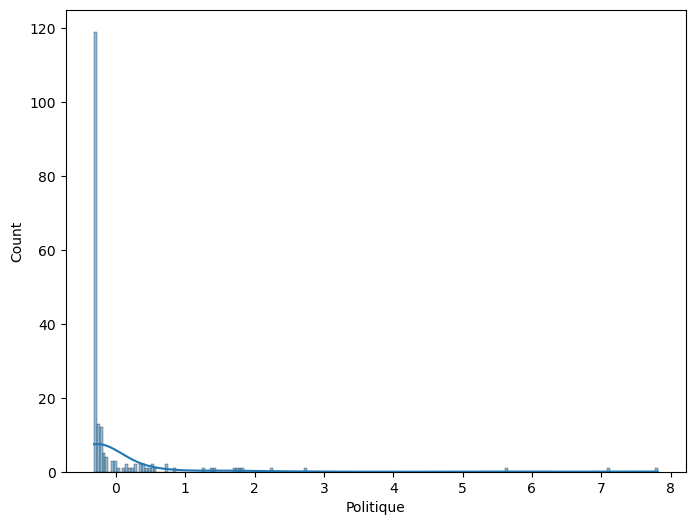

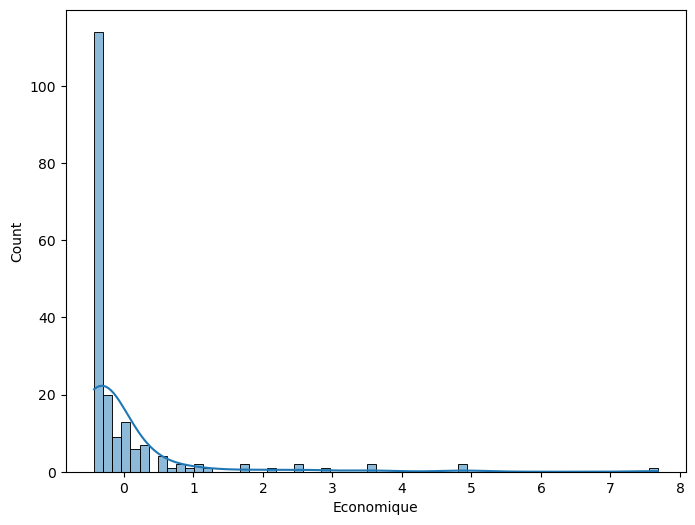

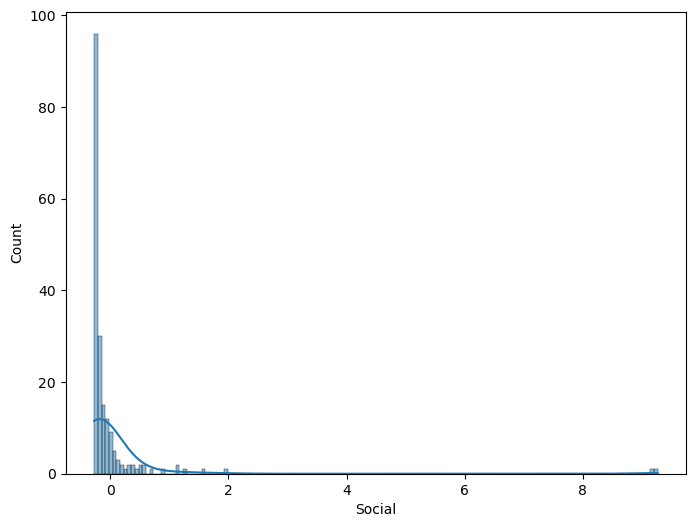

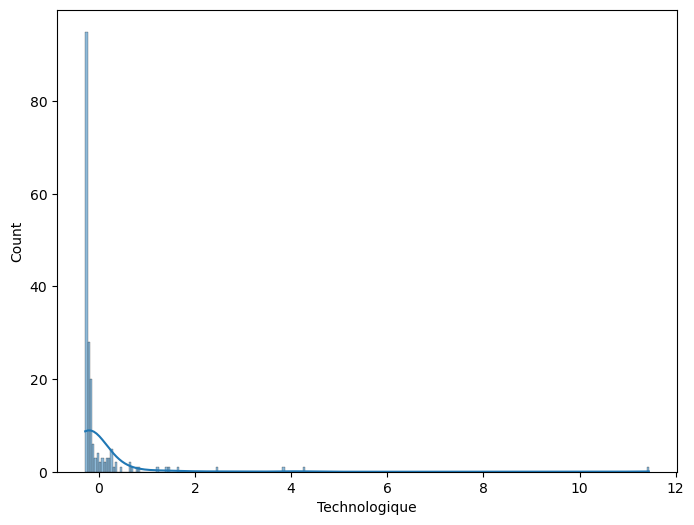

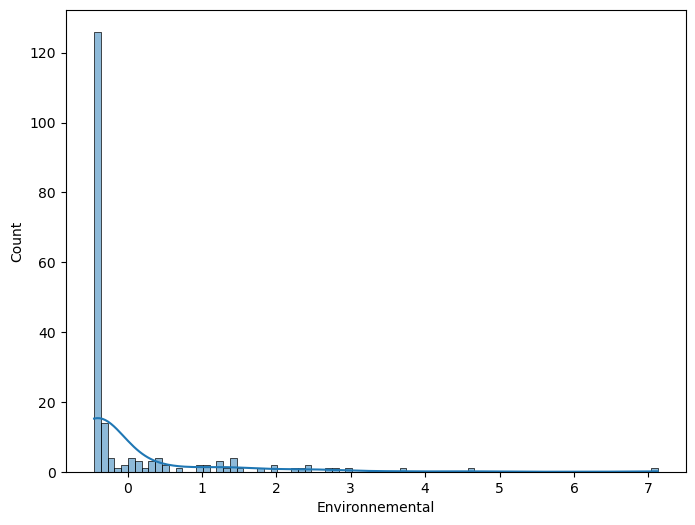

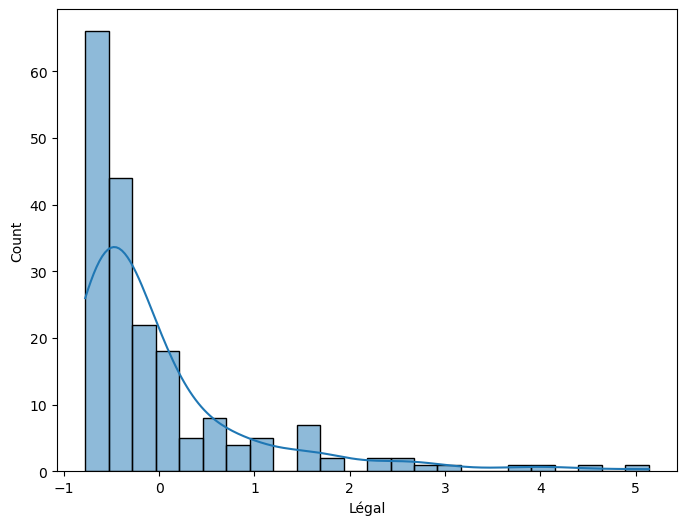

In [62]:
for column in dfPESTEL6.columns[3:]:
    plt.figure(figsize=(8,6))
    sns.histplot(data = dfPESTEL6, x=column, kde=True)
    plt.title = (f'Histogramme de la variable{column}')
    plt.show
    
    statistic, p_value = stats.normaltest(dfPESTEL6[column])
    
    
    if p_value < 0.01:
        print(f'\nLa variable {column} ne suit pas une loi normale(Shapiro-Wilk, p={p_value})')
    else : 
        print(f'\nLa variable {column} suit une loi normale (Shapiro-Wilk, p={p_value})')

<span style = 'color:chocolate; font-family:Microsoft JhengHei UI Light'> <b>    
► Aucune des variables ne suivent une loi normale. </b> </span> 

<span style='color:#635c5c'><b> OUTLIERS</span></b>

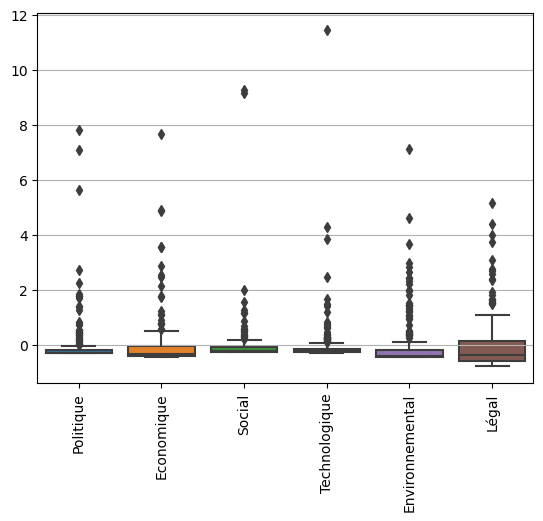

In [63]:
# Analyse descriptive des variables quantitatives
data = dfPESTEL6.iloc[:,3:]
Box = sns.boxplot(data=data)
plt.xticks(rotation='vertical')
Box.xaxis.grid(False)
Box.yaxis.grid(True)


<span style = 'color:chocolate; font-family:Microsoft JhengHei UI Light'> <b>    
► Le distributions ne suivant pas une loi normale, la méthode interquartile est utilisée pour établir les outliers.  
    ► De nombreux outliers sont observés en raison de la distribution "à queue trainante". </b> </span> 

In [64]:
# Liste des outliers:
Var_list_out = dfPESTEL6.columns.to_list()
for colonne in Var_list_out[3:]:
    detect_outliers_IQR(dfPESTEL5, colonne)


Après analyse de la variable Politique , 34 outliers sont identifiés sur les pays:
['Koweït', 'Serbie', 'République centrAfricaine', 'Bahreïn', 'Qatar', 'Espagne', 'Jordanie', 'Allemagne', 'Portugal', 'Cabo Verde', 'Macédoine du Nord', 'Géorgie', 'République démocratique du Congo', 'Danemark', 'Émirats arabes unis', 'Chine - RAS de Hong-Kong', 'Bulgarie', 'Gabon', 'Suisse', 'Congo', 'Djibouti', 'Guinée', 'Comores', 'Maldives', 'Yémen', 'Niger', 'Oman', 'Togo', 'Sao Tomé-et-Principe', 'Pays-Bas (Royaume des)', 'Arabie saoudite', 'Bénin', 'Luxembourg', 'Belgique']

Après analyse de la variable Economique , 20 outliers sont identifiés sur les pays:
['Kazakhstan', 'Canada', 'Angola', 'Fédération de Russie', 'Viet Nam', 'Chine, Taiwan Province de', 'Ghana', 'Belgique', 'Philippines', 'Cuba', 'Afrique du Sud', 'Émirats arabes unis', 'Chine - RAS de Hong-Kong', 'Pays-Bas (Royaume des)', 'Arabie saoudite', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Allemagne', 'Mexique', 'Japon',

<span style='color:#635c5c'><b> STATISTIQUES BIVARIÉES</span></b>

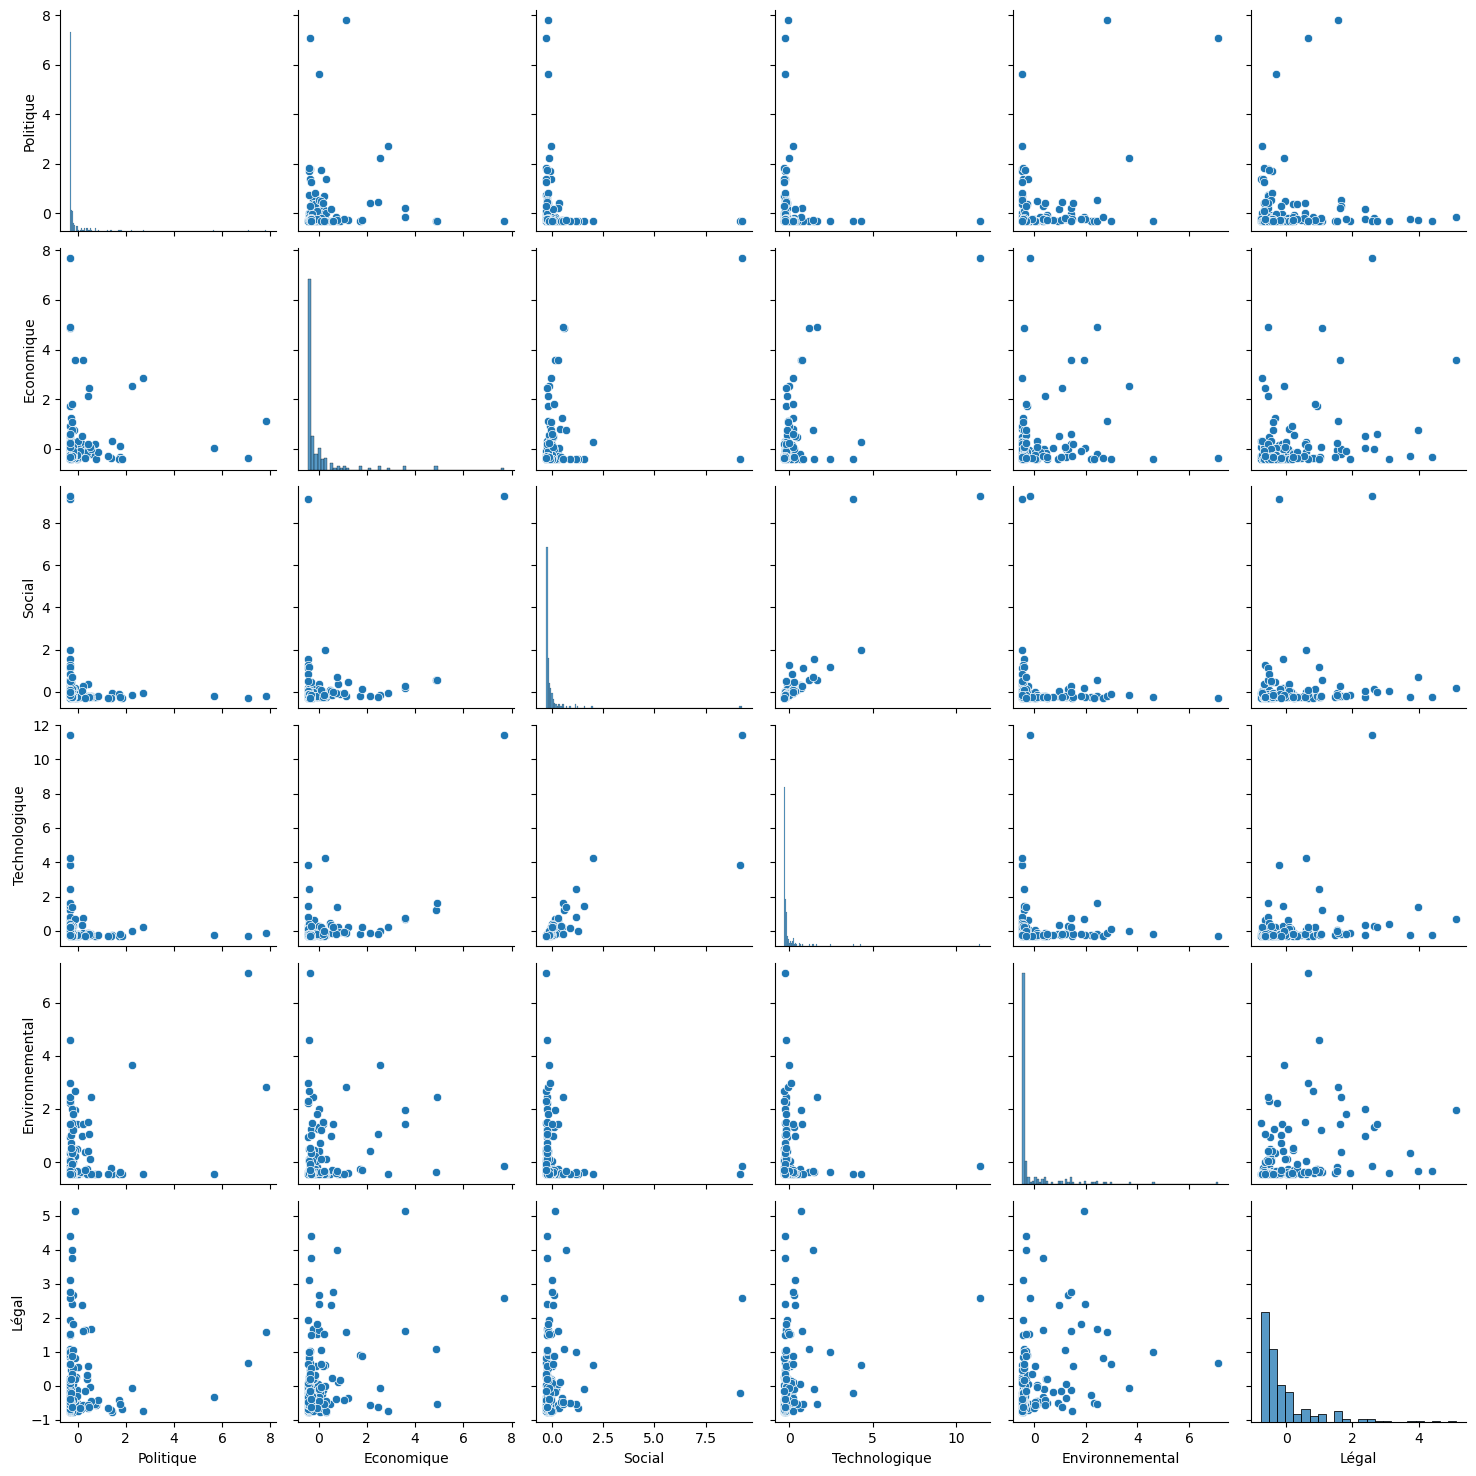

In [65]:
# Relations entre les variables qualitatives
sns.pairplot(dfPESTEL6.iloc[:,3:])

<span style='color:#635c5c'><b>CORRELATIONS ENTRE VARIABLES</span></b>

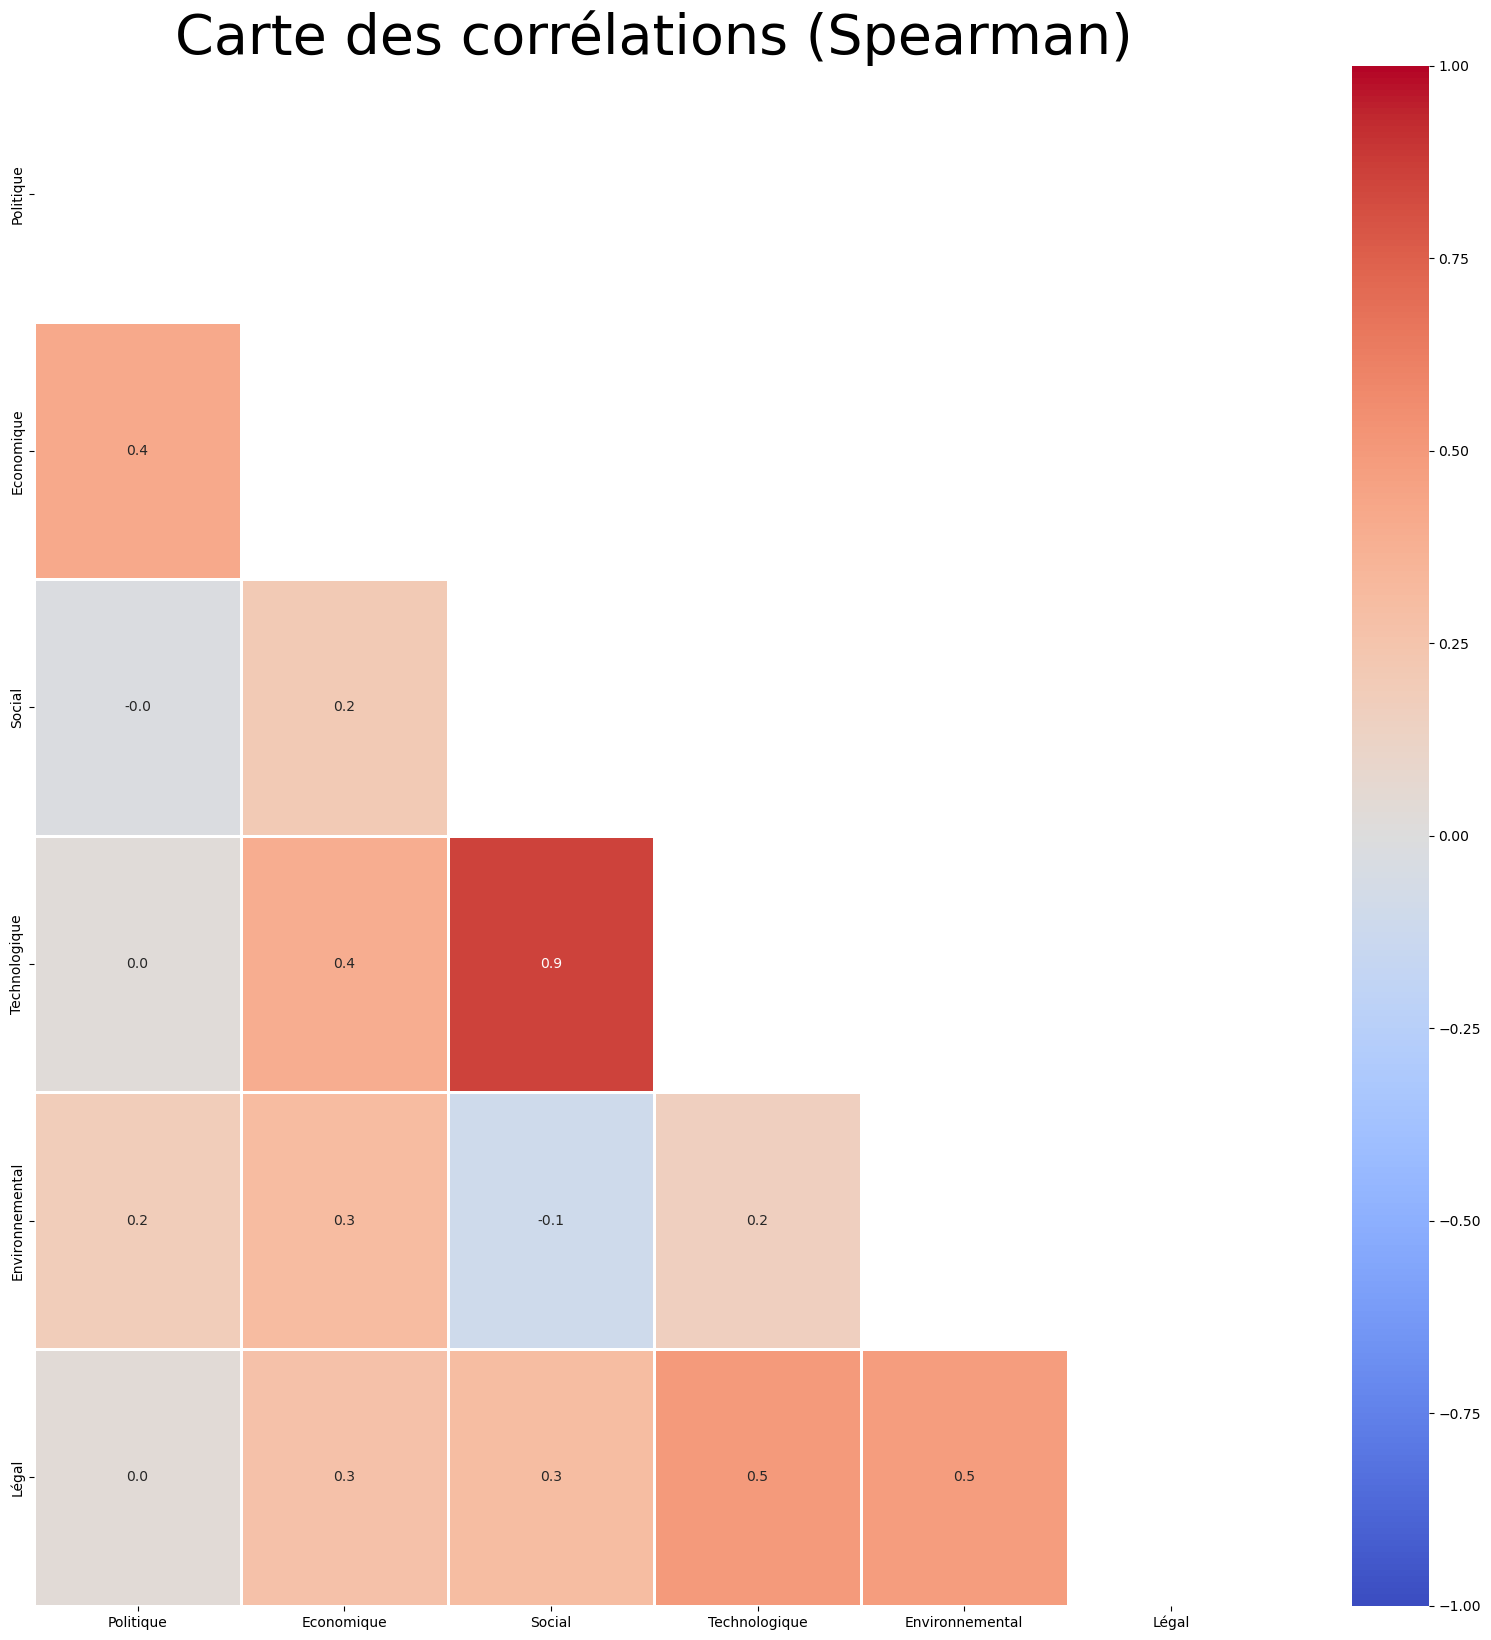

In [66]:
# Matrice de corrélation de Spearman
dfCorr = dfPESTEL6.iloc[:,3:].corr(method='spearman', min_periods=1)

# Visualiser les corrélations

plt.figure(figsize = (20,20))

mask = np.triu(np.ones_like(dfCorr,dtype=bool))

sns.heatmap(dfCorr,mask=mask, center=0, cmap='coolwarm', linewidths=1, annot=True, fmt=".1f", vmin=-1, vmax=1).set_title('Carte des corrélations (Spearman)',size=40)

plt.show()

<span style = 'color:chocolate; font-family:Microsoft JhengHei UI Light'> <b>    
► Une forte corrélation existe entre les indicateurs SOCIAL et TECHNOLOGIQUE.  
    ► N.B. Notons la présence de deux points très excentrés pour ces deux indicateurs (Inde et Chine) dans cette corrélation pourrait fausser la relation linéaire. Cependant, si l'analyse est refaite en les excluant, le coefficient de spearmann reste élevé, à 0.8 (données non montrées). </b> </span> 

## <a name="A24"><span style='color:#635c5c'> IV. Génération du fichier de travail </span></a>

<span style='color:#635c5c'><b>CRÉATION DU FICHIER</span></b>

In [67]:
# Fichier de données par pays
dfPESTEL6.to_excel('DataPESTEL.xlsx')